# Desafio Cinematográfico

A nova configuração do mercado cinematográfico exige do cineasta — e dos artistas em geral — que se torne empreendedor. Isso significa resolver problemas que não são propriamente artísticos em boa parte do tempo.
Captação de clientes, atendimento, relatórios, comprovação de gastos, controle financeiro… São muitas as habilidades que um profissional autônomo da área de Cinema deve desenvolver, mesmo que superficialmente.

Uma rede de cinemas da cidade de São Carlos/ SP gostaria de otimizar a sua renda, hoje eles possuem 2 salas de cinema uma maior, com capacidade para 150 pessoas e 1 sala menor, com capacidade para 84 pessoas.
A cada mês, a rede precisa decidir quais filmes adquirir para obter o maior número de espectadores e gostariam de fazer uma decisão mais baseada em dados. Hoje é a Juliana, funcionária mais antiga do cinema que toma essas decisões muito baseada na sua experiência a 6 anos trabalhando no ramo, mas muitas vezes as sessões não enchem como gostariam.

Também existe a possibilidade de adquirir uma nova área no shopping onde o cinema está localizado para a criação de uma sala VIP, com 100 lugares, mas existe uma dúvida se haverá retorno no investimento, se o mercado de filmes realmente está crescendo e qual tipo de filme deveria passar nessa sala nova para justificar o preço do ingresso, que custará 30% a mais do que o valor do ingresso nas salas atuais.

A Juliana, também se formou recentemente em cinema e tem pressionado o administrador do cinema a adquirir mais filmes nacionais e dublados, a teoria dela é que isso irá atrair mais clientes para o cinema, principalmente fora dos períodos de férias escolares.

Gostaríamos muito da sua ajuda para conseguir responder as seguintes perguntas:
- O mercado de filmes está crescendo ou diminuindo?
- A teoria da Juliana que os filmes nacionais têm tido cada vez mais aceitação é verdade?
- Quais outros insights podemos tirar sobre os filmes?
- Existe algum padrão em filmes que tem alta renda?
- Existe algum padrão para filmes que ficam mais tempo em cartaz do que outros?
- Existem distribuidoras que trazem filmes com mais renda?

Além disso, seria muito bom que tivéssemos um modelo que ao receber um filme, se vale a pena comprá-lo, e nos dissesse quanto tempo devemos deixar em cartaz ou quantas sessões devemos criar para ele.

**Sobre a Fonte de Dados**

Criada em 2001, a Agência Nacional de Cinema é uma agência reguladora criada em 2001. Mesmo com autonomia administrativa em relação ao governo, sua diretoria é aprovada pelo Senado e está submetida ao Ministério da Cidadania depois da extinção do Ministério da Cultura. Para ajudar os profissionais desta área, o Ministério fornece dados públicos sobre o mercado nos últimos anos:

A Ancine oferece dados públicos relativos a bilheteria semanal das obras informadas pelas distribuidoras
https://dados.gov.br/dataset/relatorio-de-bilheteira-semanal-de-obras-informada-pelas-distribuidoras

Os dados estão disponíveis nos formatos XML, CSV ou Json
E possuem as seguintes colunas:

TITULO_ORIGINAL: String – Nome original do filme

TITULO_BRASILEIRO: String – Nome do filme no Brasil

GENERO: String Genero do Filme, podendo ser Ficção, Animação, etc.

PAIS_ORIGEM: String País de Origem da produtora do filme

CPB_ROE: String Código do Filme

COPIAS: Numero inteiro -  Quantas cópias foram distribuidas

SALAS: Numero inteiro – Quantas salas de cinema passaram o filme

DT_INICIO_EXIBICAO: Data – Data de estréia do filme no Brasil

DT_FIM_EXIBICAO: Data – Data da ultima sessão do filme no Brasil

PUBLICO: Numero inteiro Quantidade de expectadores

RENDA: Numero com decimais: Valores arrecadados com bilheteria

RAZAO_SOCIAL_DISTRIBUIDORA: String – Nome da distribuidora

REGISTRO_DISTRIBUIDORA: Numero inteiro – Numero do registro na Ancine

CNPJ_DISTRIBUIDORA: String – CNPJ da distribuidora

ANO_CINEMATOGRAFICO: Numero – Ano da produção

In [1]:
# Importando as bibliotecas que serão usadas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('seaborn')
from functools import reduce
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
! pip install xgboost
from xgboost import XGBClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf
! pip install shap
import shap

In [2]:
df = pd.read_csv('Bilheteria2.csv')
df.head()

,Unnamed: 0,titulo_original,publico,tempo_exibicao,renda,salas,ano_cinematografico,razao_social_distribuidora,genero,internacional_nacional
0,0,OS DEZ MANDAMENTOS,11305479,222 days,1.168330e+08,7319,2016,SM DISTRIBUIDORA DE FILMES LTDA,Ficção,1
1,1,TROPA DE ELITE 2,11146723,168 days,1.034612e+08,6240,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Ficção,1
2,2,THE AVENGERS,10911371,132 days,1.295956e+08,6693,2012,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Ficção,0
3,3,THE AVENGERS: AGE OF ULTRON,10129071,132 days,1.461849e+08,7881,2015,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Ficção,0
4,4,FURIOUS SEVEN,9857968,138 days,1.424660e+08,5961,2016,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,Ficção,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3870 non-null   int64  
 1   titulo_original             3870 non-null   object 
 2   publico                     3870 non-null   int64  
 3   tempo_exibicao              3870 non-null   object 
 4   renda                       3870 non-null   float64
 5   salas                       3870 non-null   int64  
 6   ano_cinematografico         3870 non-null   int64  
 7   razao_social_distribuidora  3870 non-null   object 
 8   genero                      3870 non-null   object 
 9   internacional_nacional      3870 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 302.5+ KB


In [4]:
df.shape

(3870, 10)

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
pd.set_option('mode.use_inf_as_na', True)

**VARIÁVEL RAZÃO RENDA E PÚBLICO**

In [7]:
# preço médio do ingresso dos principais filmes internacionais e nacionais
df['preco_medio_ingresso'] = (df['renda']/df['publico'])

# ANÁLISE EXPLORATÓRIA DOS DADOS

# O mercado de filmes está crescendo ou diminuindo?

In [8]:
cor = sns.color_palette('magma_r', 10)

In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [10]:
novodf = df.groupby('ano_cinematografico')['renda'].sum()
pd.DataFrame(novodf)

,renda
ano_cinematografico,
2009,453488205.390
2010,979124359.500
2011,1379835526.990
2012,1376774992.370
2013,1281508894.440
2014,1491782528.910
2015,2458380432.150
2016,3176425776.160
2017,4074668715.390


In [11]:
novodf2 = df.groupby('ano_cinematografico')['publico'].sum()
pd.DataFrame(novodf2)

,publico
ano_cinematografico,
2009,52806284
2010,106586529
2011,143104439
2012,127734010
2013,115175093
2014,122483160
2015,198081137
2016,238342396
2017,276711876


In [12]:
data_frames = (novodf, novodf2, df)
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['ano_cinematografico'],
                                            how='outer'), data_frames)
df_merged.head()

,ano_cinematografico,renda_x,publico_x,titulo_original,publico_y,tempo_exibicao,renda_y,salas,razao_social_distribuidora,genero,internacional_nacional,preco_medio_ingresso
0,2009,453488205.390,52806284,X-MEN ORIGINS: WOLVERINE,3199434,84 days,27352313.000,3608,FOX FILM DO BRASIL LTDA,Ficção,0,8.549
1,2009,453488205.390,52806284,ANGELS & DEMONS,3059245,102 days,28006514.750,3018,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,Ficção,0,9.155
2,2009,453488205.390,52806284,NIGHT AT THE MUSEUM: BATTLE OF THE SMITHSONIAN,2602771,186 days,21118969.000,2771,FOX FILM DO BRASIL LTDA,Ficção,0,8.114
3,2009,453488205.390,52806284,FAST & FURIOUS,2308197,102 days,20010990.000,1867,PARAMOUNT PICTURES BRASIL DISTRIBUIDORA DE FIL...,Ficção,0,8.670
4,2009,453488205.390,52806284,OS NORMAIS 2,2202640,102 days,18978259.880,3129,WMIX DISTRIBUIDORA LTDA.,Ficção,1,8.616


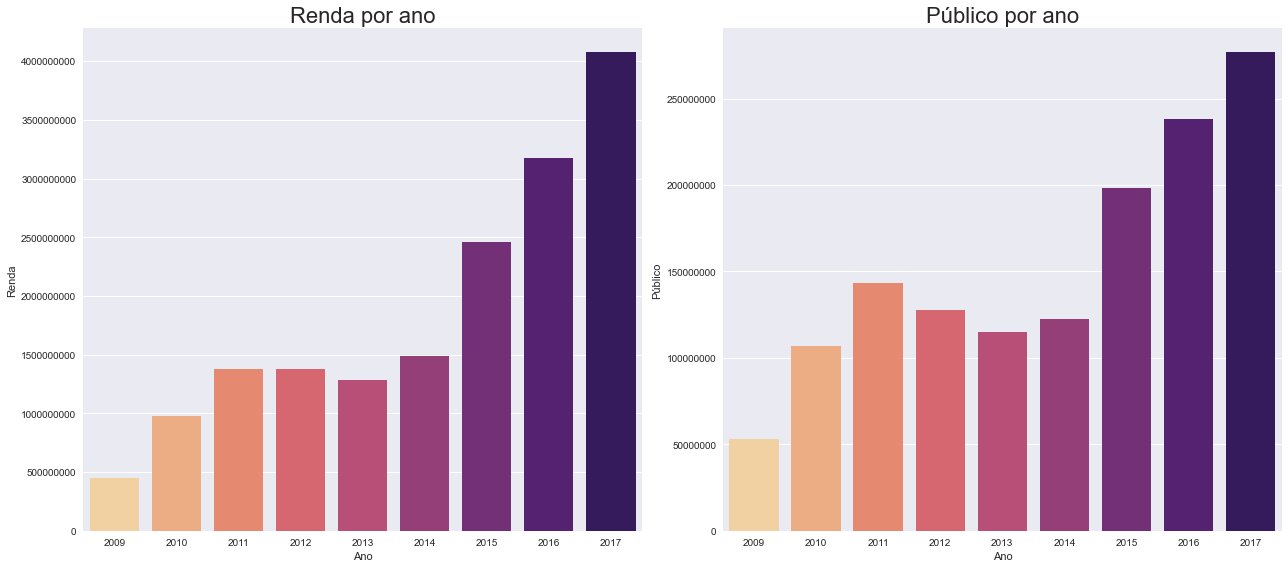

<Figure size 576x396 with 0 Axes>

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8)) 

sns.barplot(ax = axes[0],
            data = df_merged,
            x = 'ano_cinematografico',
            y = 'renda_x',
            palette = cor,
            ci = None).set_title("Renda por ano", fontsize = 22, fontweight = 200)
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Renda')
axes[0].ticklabel_format(style='plain', axis='y')

sns.barplot(ax = axes[1],
            data = df_merged,
            x = 'ano_cinematografico',
            y = 'publico_x',
            palette = cor,
            ci = None).set_title("Público por ano", fontsize = 22)
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Público')
axes[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()
plt.savefig('evolucaomercado.png', format='png')

**TAXAS DE CRESCIMENTO**

In [14]:
# tx de crescimento da renda total ano a ano
t2 = df.groupby('ano_cinematografico')['renda'].sum().pct_change().round(2) * 100
t2.fillna(0, inplace=True)
t2

ano_cinematografico
2009     0.000
2010   116.000
2011    41.000
2012    -0.000
2013    -7.000
2014    16.000
2015    65.000
2016    29.000
2017    28.000
Name: renda, dtype: float64

Text(0.5, 1.0, 'Taxa de crescimento da renda ano a ano')

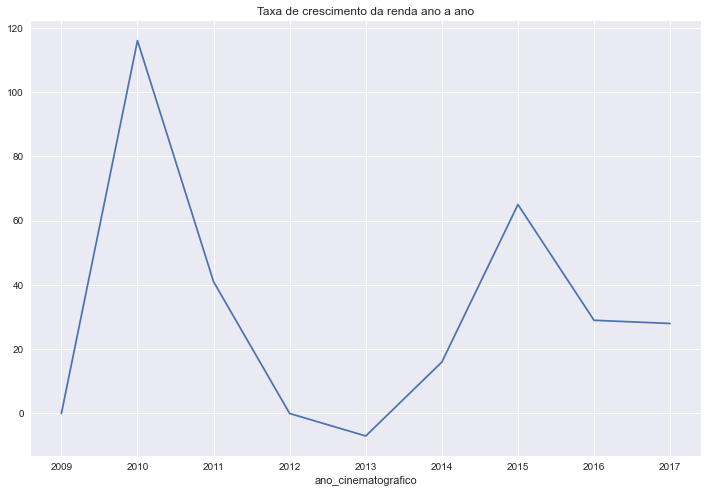

In [15]:
plt.figure(figsize=(12,8))
t2.plot()
plt.title('Taxa de crescimento da renda ano a ano')

In [16]:
# tx de crescimendo do público total ano a ano
t3 = df.groupby('ano_cinematografico')['publico'].sum().pct_change().round(2) * 100
t3.fillna(0, inplace=True)
t3

ano_cinematografico
2009     0.000
2010   102.000
2011    34.000
2012   -11.000
2013   -10.000
2014     6.000
2015    62.000
2016    20.000
2017    16.000
Name: publico, dtype: float64

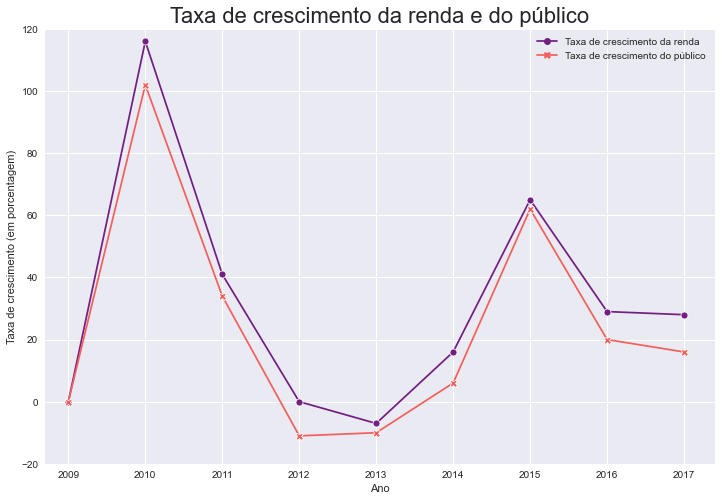

In [17]:
plt.figure(figsize=(12,8))
taxas = {'Ano': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
         'Taxa de crescimento da renda': t2,
         'Taxa de crescimento do público': t3}
taxas = pd.DataFrame(taxas)
taxas = taxas.set_index('Ano')
sns.lineplot(data = taxas, palette = 'magma', markers = True, dashes = False).set_title('Taxa de crescimento da renda e do público',
                                                                                         fontsize = 22, fontweight = 200)
plt.ylim(-20, 120)
plt.xlim(2008.7)
plt.ylabel('Taxa de crescimento (em porcentagem)')
plt.savefig('taxacrescimento.png', format='png')

In [18]:
df.groupby('ano_cinematografico')['renda'].sum().pct_change(periods = 8).round(2) * 100

ano_cinematografico
2009       NaN
2010       NaN
2011       NaN
2012       NaN
2013       NaN
2014       NaN
2015       NaN
2016       NaN
2017   799.000
Name: renda, dtype: float64

In [19]:
df.groupby('ano_cinematografico')['publico'].sum().pct_change(periods = 8).round(2) * 100

ano_cinematografico
2009       NaN
2010       NaN
2011       NaN
2012       NaN
2013       NaN
2014       NaN
2015       NaN
2016       NaN
2017   424.000
Name: publico, dtype: float64

**Taxa total de crescimento de 799%, bastante, mas as taxas parciais revelam uma queda da taxa de crescimento entre 2013 e 2014. Se a gene for pensar no Brasil, os anos de 2013 e 2014 foram difíceis para a economia, começamos a sentir com mais força a crise financeira de 2008, talvez tenha alguma relação...**

# A teoria da Juliana que os filmes nacionais têm tido cada vez mais aceitação é verdade?

**Em 2011 teve Tropa de Elite 2, e em 2013 dois filmes nacionais bombaram: De pernas pro ar 2 e Minha mãe é uma peça. Apesar de que foi em 2016 o filme com mais público (Os dez mandamentos) e em 2017 o mais rentável (Minha mãe é uma peça 2), nesses mesmos anos não tiveram tantos outros grandes sucessos nacionais.**

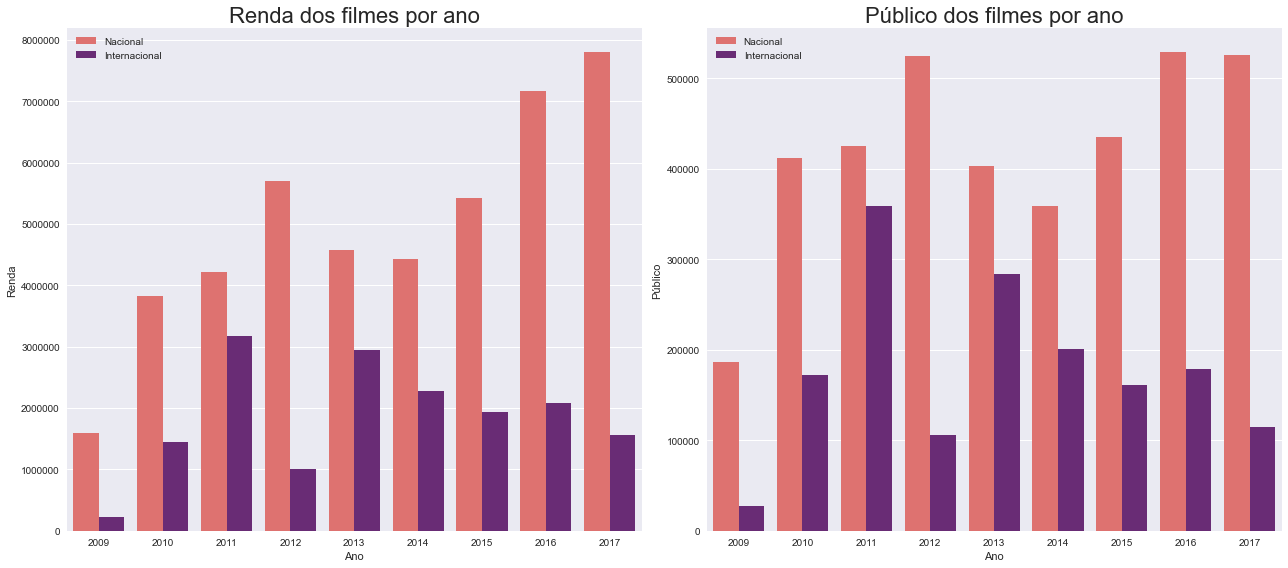

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8)) 

sns.barplot(ax = axes[0],
            data = df,
            x = 'ano_cinematografico',
            y = 'renda',
            hue = 'internacional_nacional',
            ci = None,
            palette = 'magma_r').set_title("Renda dos filmes por ano", fontsize = 22, fontweight = 200)
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Renda')
axes[0].ticklabel_format(axis = "y", style = 'plain')
axes[0].legend(np.arange(2), labels = ['Nacional', 'Internacional'])

sns.barplot(ax = axes[1],
            data = df,
            x = 'ano_cinematografico',
            y = 'publico',
            hue = 'internacional_nacional',
            ci = None,
            palette = 'magma_r').set_title("Público dos filmes por ano", fontsize = 22, fontweight = 200)
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Público')
axes[1].legend(np.arange(2), labels = ['Nacional', 'Internacional'])

plt.tight_layout()
plt.show()

In [21]:
dfnacional = df.loc[(df.internacional_nacional == 1)]
dfnacional.head()

,titulo_original,publico,tempo_exibicao,renda,salas,ano_cinematografico,razao_social_distribuidora,genero,internacional_nacional,preco_medio_ingresso
0,OS DEZ MANDAMENTOS,11305479,222 days,116833026.880,7319,2016,SM DISTRIBUIDORA DE FILMES LTDA,Ficção,1,10.334
1,TROPA DE ELITE 2,11146723,168 days,103461153.740,6240,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Ficção,1,9.282
8,MINHA MÃE É UMA PEÇA 2,9234363,108 days,124681177.820,6462,2017,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,Ficção,1,13.502
35,SE EU FOSSE VOCÊ 2,5787244,264 days,47624137.000,4162,2010,FOX FILM DO BRASIL LTDA,Ficção,1,8.229
51,DE PERNAS PRO AR 2,4846273,90 days,50312134.360,4050,2013,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,Ficção,1,10.382


In [22]:
n = dfnacional.groupby('ano_cinematografico')['publico'].sum()

In [23]:
publico_ano_nacional = n.pct_change().round(2) * 100
publico_ano_nacional.fillna(0, inplace=True)
publico_ano_nacional

ano_cinematografico
2009     0.000
2010   360.000
2011   179.000
2012   -75.000
2013   181.000
2014   -23.000
2015    16.000
2016    24.000
2017   -13.000
Name: publico, dtype: float64

In [24]:
m = dfnacional.groupby('ano_cinematografico')['renda'].sum()

In [25]:
renda_ano_nacional = m.pct_change().round(2) * 100
renda_ano_nacional.fillna(0, inplace=True)
renda_ano_nacional

ano_cinematografico
2009     0.000
2010   365.000
2011   193.000
2012   -73.000
2013   207.000
2014   -16.000
2015    23.000
2016    21.000
2017     1.000
Name: renda, dtype: float64

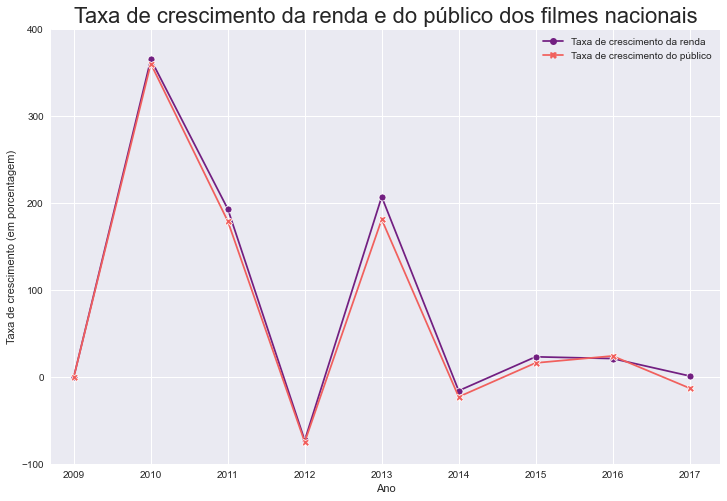

In [26]:
plt.figure(figsize =(12, 8))
taxas = {'Ano': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
        'Taxa de crescimento da renda': renda_ano_nacional,
        'Taxa de crescimento do público': publico_ano_nacional}

taxas = pd.DataFrame(taxas)
taxas = taxas.set_index('Ano')

sns.lineplot(data = taxas, palette = 'magma', markers = True, dashes = False) \
.set_title('Taxa de crescimento da renda e do público dos filmes nacionais', fontsize = 22, fontweight = 200)

plt.ylim(-100, 400)
plt.xlim(2008.7)
plt.ylabel('Taxa de crescimento (em porcentagem)')
plt.savefig('taxacrescimentonacional.png', format='png')

In [27]:
txtotal_nacional_publico = n.pct_change(periods=8).round(2) * 100
txtotal_nacional_publico.fillna(0, inplace=True)
txtotal_nacional_publico

ano_cinematografico
2009     0.000
2010     0.000
2011     0.000
2012     0.000
2013     0.000
2014     0.000
2015     0.000
2016     0.000
2017   780.000
Name: publico, dtype: float64

In [28]:
txtotal_nacional_renda = m.pct_change(periods=8).round(2) * 100
txtotal_nacional_renda.fillna(0, inplace=True)
txtotal_nacional_renda

ano_cinematografico
2009      0.000
2010      0.000
2011      0.000
2012      0.000
2013      0.000
2014      0.000
2015      0.000
2016      0.000
2017   1330.000
Name: renda, dtype: float64

In [29]:
n = pd.DataFrame(n)

In [30]:
m = pd.DataFrame(m)

In [31]:
data_frames = (n, m)
df_merged2 = reduce(lambda  left,right: pd.merge(left,right,on=['ano_cinematografico'],
                                            how='outer'), data_frames)
df_merged2.head()

,publico,renda
ano_cinematografico,,
2009,2958501,24727147.160
2010,13613274,114986603.570
2011,38047488,337340150.290
2012,9694711,92143209.580
2013,27196567,282976383.930


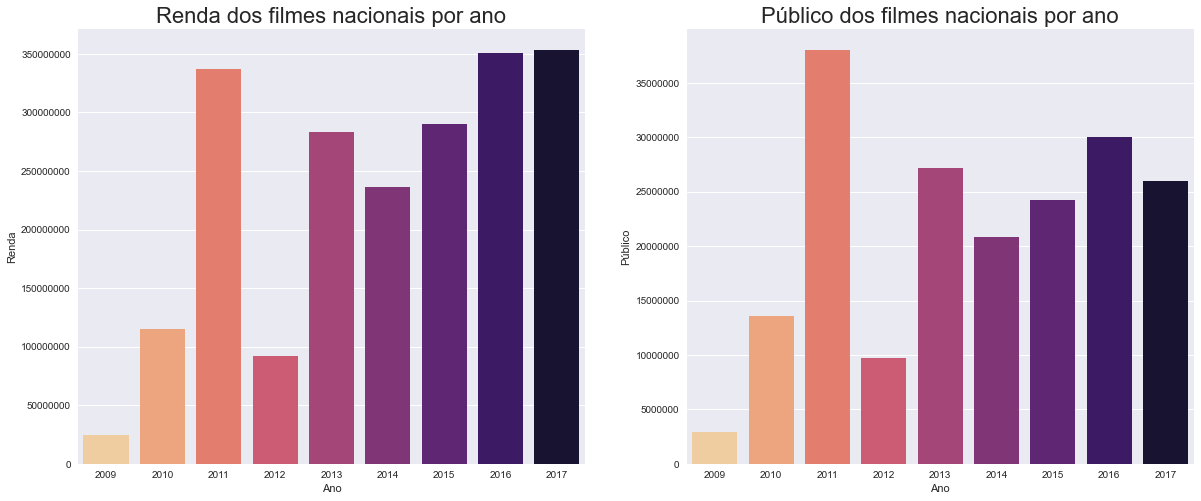

In [32]:
fig, axes = plt.subplots(1, 2, figsize = (20, 8))

sns.barplot(ax = axes[0],
           data = df_merged2,
           x = df_merged2.index,
           y = 'renda',
           ci = None,
           palette = 'magma_r').set_title('Renda dos filmes nacionais por ano', fontsize = 22, fontweight = 200)

axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Renda')
axes[0].ticklabel_format(axis= 'y', style = 'plain')

sns.barplot(ax = axes[1],
           data = df_merged2,
           x = df_merged2.index,
           y = 'publico',
           ci = None,
           palette = 'magma_r').set_title('Público dos filmes nacionais por ano', fontsize = 22, fontweight = 200)

axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Público')
axes[1].ticklabel_format(axis= 'y', style = 'plain')
plt.savefig('evolucaomercadonacional.png', format='png')

# Existem distribuidoras que trazem filmes com mais renda?

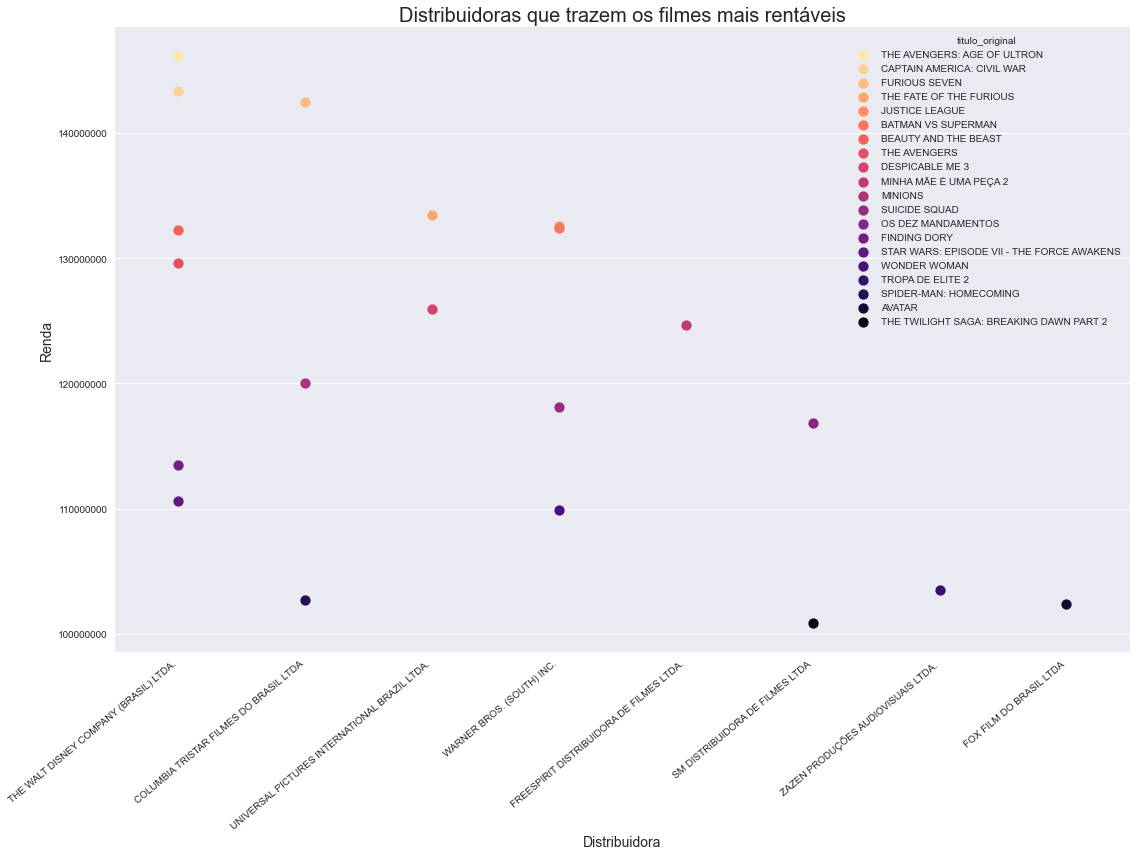

In [33]:
plt.figure(figsize=(16,12))

df = df.sort_values(by ='renda', ascending=False)
df2=df.head(20)
ax=sns.pointplot(df2['razao_social_distribuidora'], df2['renda'], hue=df2['titulo_original'], palette='magma_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribuidoras que trazem os filmes mais rentáveis', fontsize = 20)
plt.xlabel('Distribuidora', fontsize = 14)
plt.ylabel('Renda', fontsize = 14)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('distrentavel.png', format='png')

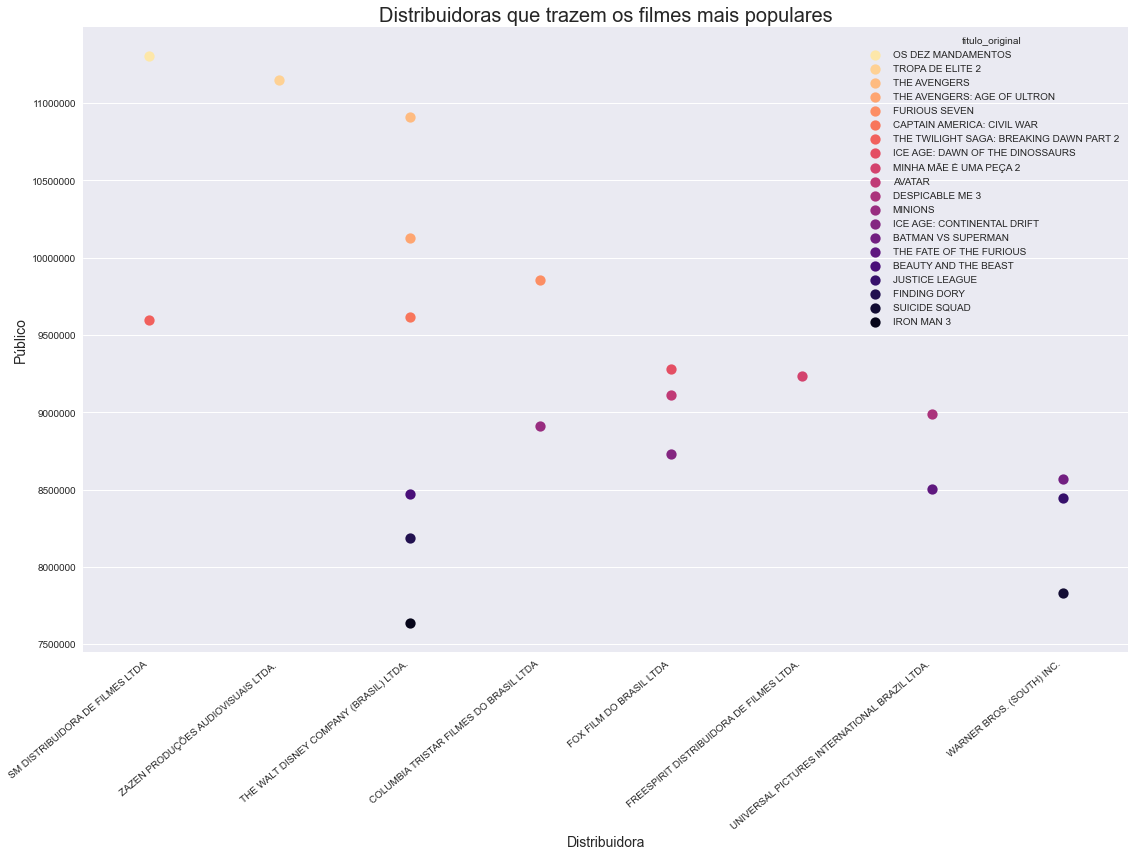

In [34]:
plt.figure(figsize=(16,12))

df = df.sort_values(by ='publico', ascending=False)
df2=df.head(20)
ax=sns.pointplot(df2['razao_social_distribuidora'], df2['publico'], hue=df2['titulo_original'], palette='magma_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribuidoras que trazem os filmes mais populares', fontsize = 20)
plt.xlabel('Distribuidora', fontsize = 14)
plt.ylabel('Público', fontsize = 14)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

O rendimento médio anual apresenta oscilações entre 2009 e 2017, sempre em desvantagem com relação aos títulos internacionais. Os picos em 2011 e 2013 podem ser explicados por alguns títulos de sucesso, como Tropa de Elite 2 (2011), De Pernas pro Ar 2 e Minha Mãe é Uma Peça (ambos de 2013). Apesar do filme de maior público em 2016 ter sido nacional (Os Dez Mandamentos), assim como o rentável em 2017 (Minha Mãe é Uma Peça 2), nesses mesmos anos não tivemos outros grandes sucessos nacionais de bilheteria.

Podemos perceber que o padrão de público acompanha aquele dos rendimentos. Do ponto de visto do desempenho das distribuidoras, por outro lado, talvez seja possível delinear um cenário de crescimento.

Dentre as distribuidoras com rendimento médio individual acima de 10 milhões de reais para todo o período — apenas uma é brasileira. A Zazen Produções é responsável por títulos como Tropa de Elite (2007) e Tropa de Elite 2 (2010) — embora estes tenham sido os únicos lançamentos de maior sucesso de bilheteria da distribuidora. Apesar disso, 11 das três distribuidoras com rendimento médio entre 1 milhão até 10 milhões de reais são brasileiras (levando em consideração a série temporal de 2010 a 2017). Outro ponto positivo é a produção e distribuição de filmes nacionais por grandes distribuidoras internacionais, como a Fox Filmes do Brasil. Essa última é responsável pelo lançamento de Se eu Fosse Você 2 (2010), que rendeu quase 48 mi de reais nesse ano.

Entre as distribuidoras brasileiras que acumulam alguns sucessos, os rendimentos ano a ano demonstram oscilações, mas tomadas em conjunto a perspectiva pode ser positiva. A Downtown Filmes, por exemplo, se recuperou de uma fase ruim entre 2016 e 2017, saltando de um rendimento de cerca de 7 milhões para 21 milhões de reais. O último ano foi o de exibição de Minha Mãe é uma Peça 2, distribuída pela Downtown em conjunto com a Paris Filmes. Essa última distribuidora é a responsável por Os Dez Mandamentos (2016). Infelizmente, 2017 apresentou queda brusca nos rendimentos da Paris Filmes, que não ultrapassou a marca dos 6 milhões em retorno, o que corresponde a menos de um terço dos rendimentos do ano anterior. Há ainda a novata H20 Distribuidora, fundada em 2012. Ela passou de um rendimento anual inferior a 500 mil reais entre 2013 e 2014 para um que superou 11 milhões em 2014. Desde então, apresenta trajetória de crescimento (com exceção de 2016).

Em conclusão, com o grande sucesso de alguns títulos nacionais — que inclusive superou o de filmes internacionais em 2011 com Tropa de Elite 2, há motivos para apostar na aceitação do público. O amadurecimento e especialização crescente das distribuidoras nacionais, somada à firmação de parcerias com produtoras internacionais experientes e bem sucedidas em ascensão, poderíamos esperar receptividade do público. Vale lembrar que somente 30% dos filmes entre 2009 e 2017 apresentam rendimento médio acima de 1 milhão de reais. Portanto, no cotidiano são os filmes de menor rendimento que devem circular nas salas de exibição. Dada a obrigatoriedade de exibição de uma cota mínima de filmes nacionais, a escolha com base em distribuidoras mais consolidadas pode ser uma medida mais segura do retorno dos filmes.

# ABERTURA DE UMA SALA VIP

In [35]:
media_preco_ano = df.groupby('ano_cinematografico')['preco_medio_ingresso'].mean()
media_preco_ano.head(10)

ano_cinematografico
2009    6.680
2010    8.567
2011    8.909
2012    9.882
2013   11.219
2014   11.754
2015   12.887
2016   13.704
2017   13.929
Name: preco_medio_ingresso, dtype: float64

Text(0, 0.5, 'Preço médio')

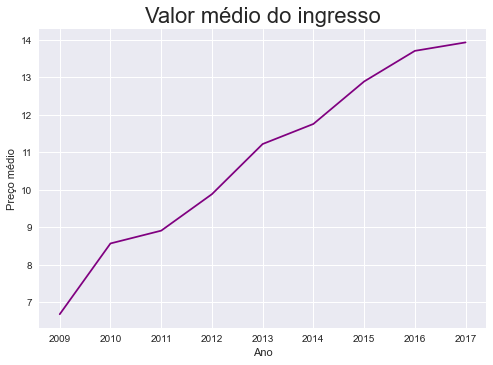

In [36]:
sns.lineplot(data = media_preco_ano, color = 'purple', markers = True, dashes = False) \
.set_title('Valor médio do ingresso', fontsize = 22, fontweight = 200)
plt.xlabel('Ano')
plt.ylabel('Preço médio')

In [37]:
media_renda_ano = df.groupby('ano_cinematografico')['renda'].mean()
media_renda_ano.head(10)

ano_cinematografico
2009   1199704.247
2010   3210243.802
2011   3908882.513
2012   4343138.777
2013   4081238.517
2014   3854735.217
2015   4469782.604
2016   5652003.160
2017   5787881.698
Name: renda, dtype: float64

In [38]:
media_publico_ano = df.groupby('ano_cinematografico')['publico'].mean()
media_publico_ano.head(10)

ano_cinematografico
2009   139699.164
2010   349464.030
2011   405395.011
2012   402946.404
2013   366799.659
2014   316493.953
2015   360147.522
2016   424096.790
2017   393056.642
Name: publico, dtype: float64

Text(0, 0.5, 'Taxa de crescimento (em porcentagem)')

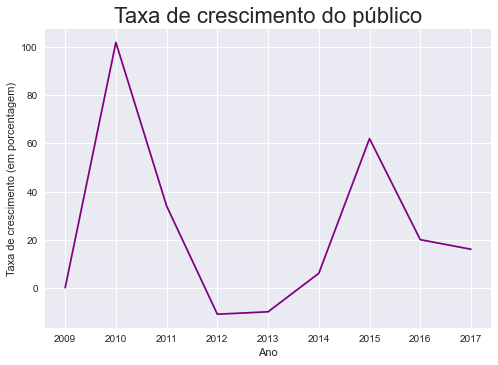

In [39]:
sns.lineplot(data = t3, color = 'purple', markers = True, dashes = False) \
.set_title('Taxa de crescimento do público', fontsize = 22, fontweight = 200)
plt.xlabel('Ano')
plt.ylabel('Taxa de crescimento (em porcentagem)')

**Abertura de nova sala VIP com 100 lugares com preço do ingresso 30% mais caro:**

Uma nova sala com 100 lugares significa um aumento de aproximadamente 33,4% da capacidade total do cinema. Para, no mínimo, manter a renda anual do último ano (2017), o cinema precisaria, então, de um crescimento de 43% do público (cerca de 169.015 pessoas a mais anualmente) em relação ao ano anterior - caso o valor do ingresso fosse o mesmo (segundo a média: aproximadamente 14 reais). No entanto, como a nova sala cobra 30% a mais no ingresso (18 reais), então o crescimento de público poderia ser de "apenas" cerca de 23% - para se manter a renda anual. No entanto, ainda que o mercado apresente uma tendência de crescimento entre 2009 e 2017, essa taxa de crescimento é muito otimista comparada à taxa de crescimento do último ano.

# Existe algum padrão em filmes que tem alta renda?

In [40]:
# Criando um subset com os titulos e a renda

filme_e_renda = df.groupby('titulo_original')['renda'].sum()
filme_e_renda = filme_e_renda.reset_index(name = 'renda')
filme_e_renda = filme_e_renda.sort_values(by = 'renda', ascending = False)
filme_e_renda = filme_e_renda.head(20) # Selecionando apenas os 20 mais rentáveis

In [41]:
# Criando um subset com o gênero e a renda

genero_e_renda = df.groupby('genero')['renda'].sum()
genero_e_renda = genero_e_renda.reset_index(name = 'renda')
genero_e_renda = genero_e_renda.sort_values(by = 'renda', ascending = False)

Text(0.5, 1.0, 'Título dos filmes que mais renderam')

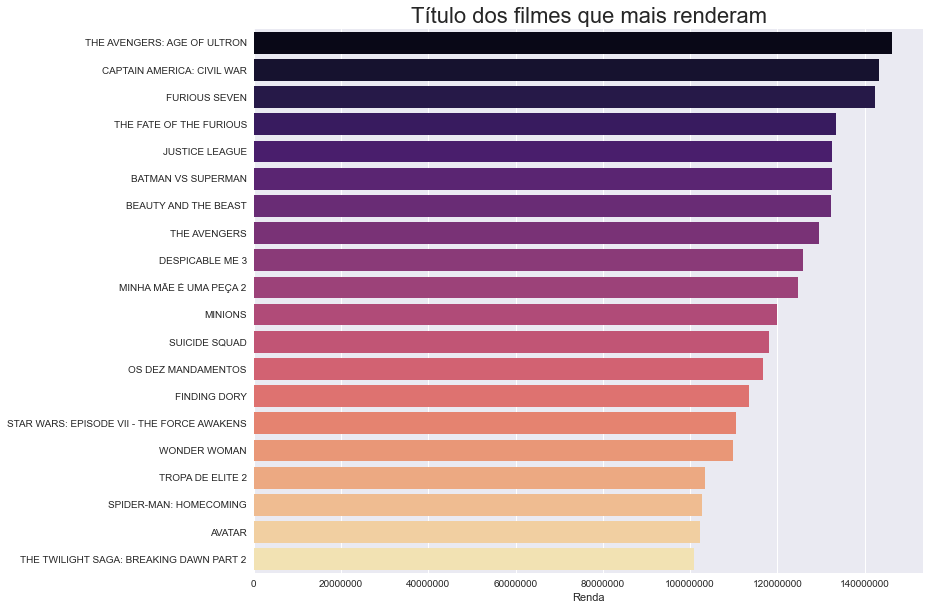

In [42]:
plt.figure(figsize=(12,10))

sns.barplot(data = filme_e_renda,
            x = 'renda',
            y = 'titulo_original',
            palette = 'magma')
plt.ticklabel_format(axis = "x", style = 'plain')
plt.xlabel('Renda')
plt.ylabel('')
plt.title('Título dos filmes que mais renderam', fontsize = 22, fontweight = 200)

Text(0.5, 1.0, 'Gênero dos filmes que mais renderam')

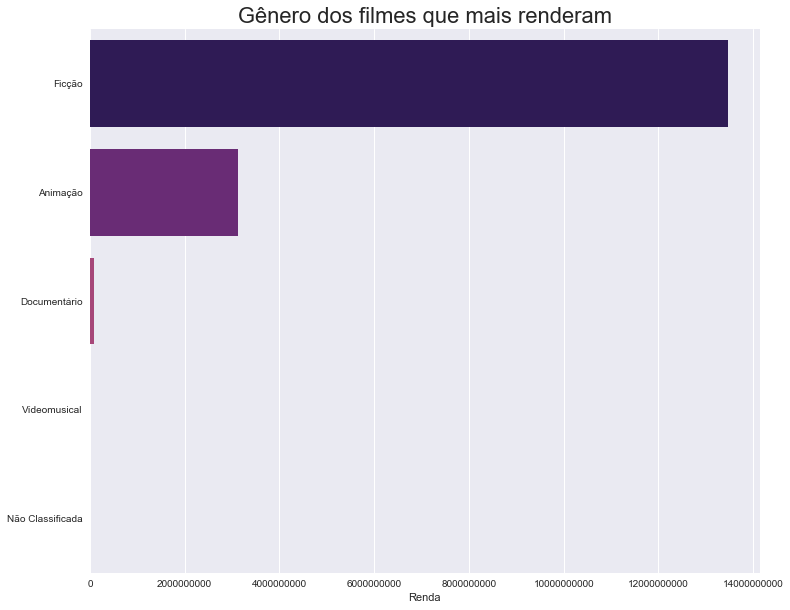

In [43]:
plt.figure(figsize=(12,10))

sns.barplot(data = genero_e_renda,
            x = 'renda',
            y = 'genero',
            palette = 'magma')
plt.xlabel('Renda')
plt.ylabel('')
plt.ticklabel_format(axis = "x", style = 'plain')
plt.title('Gênero dos filmes que mais renderam', fontsize = 22, fontweight = 200)

Os filmes que possuem alta renda são majoritariamente de ficção. Isto pode ser devido ao sucesso estrondoso dos filmes de herói, principalmente da Marvel.

**Criando uma divisão para Distribuidoras**

In [44]:
# Criando uma divisão de distribuidoras em 'major', 'media', 'menor' de acordo com rendimento
dist_dict = {
'UNIVERSAL PICTURES INTERNATIONAL BRAZIL LTDA.': 'major', #major: acima de 10 Mi#
'THE WALT DISNEY COMPANY (BRASIL) LTDA.': 'major',
'ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.': 'major',
'FOX FILM DO BRASIL LTDA': 'major',
'WARNER BROS. (SOUTH) INC.': 'major',
'PARAMOUNT PICTURES BRASIL DISTRIBUIDORA DE FILMES LTDA': 'major',
'COLUMBIA TRISTAR FILMES DO BRASIL LTDA': 'media', #media: de 1 até 10 Mi#
'FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.': 'media',
'SM DISTRIBUIDORA DE FILMES LTDA': 'media',
'CANZION DO BRASIL LTDA': 'media',
'H2O DISTRIBUIDORA DE FILMES LTDA': 'media',
'WMIX DISTRIBUIDORA LTDA.': 'media',
'DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃO AUDIOVISUAL LTDA.': 'media',
'PLAYARTE PICTURES ENTRETENIMENTOS LTDA.': 'media',
'GRAÇA FILMES PRODUTORA E DISTRIBUIDORA LTDA': 'media',
'ELIMAR PRODUÇÕES ARTÍSTICAS LTDA': 'media',
'CUATRO DAMAS FILMES LTDA.': 'media',
'CANNES PRODUÇÕES S/A': 'media',
'CHATO LTDA': 'media'
}

df['distribuidoras2'] = df['razao_social_distribuidora'].map(dist_dict).fillna('menores')
df.head(3)

,titulo_original,publico,tempo_exibicao,renda,salas,ano_cinematografico,razao_social_distribuidora,genero,internacional_nacional,preco_medio_ingresso,distribuidoras2
0,OS DEZ MANDAMENTOS,11305479,222 days,116833026.880,7319,2016,SM DISTRIBUIDORA DE FILMES LTDA,Ficção,1,10.334,media
1,TROPA DE ELITE 2,11146723,168 days,103461153.740,6240,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Ficção,1,9.282,major
2,THE AVENGERS,10911371,132 days,129595590.000,6693,2012,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Ficção,0,11.877,major


In [45]:
df['distribuidoras2'].value_counts()

menores    1989
media      1230
major       651
Name: distribuidoras2, dtype: int64

**Criando uma divisão para renda**

<AxesSubplot:xlabel='renda'>

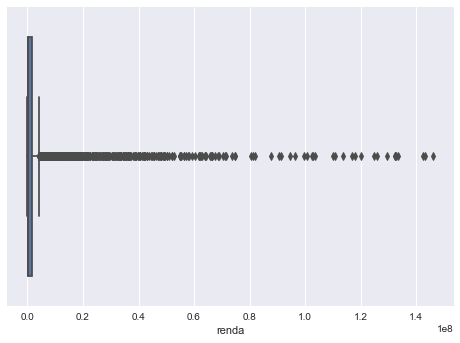

In [46]:
sns.boxplot(df.renda)

In [47]:
# Criando faixas de renda
altissimo = len(df[(df['renda'] > 25000000)])
alto = len(df[(df['renda'] <= 25000000) & (df['renda'] > 10000000)])
medio = len(df[(df['renda'] <= 10000000) & (df['renda'] > 1000000)])
baixo = len(df[(df['renda' ] <= 1000000) & (df['renda'] >= 500000)])
baixissimo = len(df[(df['renda'] < 500000)])

In [48]:
conditions = [
    (df['renda'] > 25000000),
    (df['renda'] <= 25000000) & (df['renda'] > 10000000),
    (df['renda'] <= 10000000) & (df['renda'] > 1000000),
    (df['renda'] <= 1000000) & (df['renda'] >= 500000),
    (df['renda'] < 500000)
]

values = ['altissimo', 'alto', 'medio', 'baixo', 'baixissimo']

df['rendacat'] = np.select(conditions, values)

df.head(2)

,titulo_original,publico,tempo_exibicao,renda,salas,ano_cinematografico,razao_social_distribuidora,genero,internacional_nacional,preco_medio_ingresso,distribuidoras2,rendacat
0,OS DEZ MANDAMENTOS,11305479,222 days,116833026.880,7319,2016,SM DISTRIBUIDORA DE FILMES LTDA,Ficção,1,10.334,media,altissimo
1,TROPA DE ELITE 2,11146723,168 days,103461153.740,6240,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Ficção,1,9.282,major,altissimo


In [49]:
conditions = [
    (df['renda'] > 1000000),
    (df['renda'] <= 1000000)
]

values = ['alto', 'baixo']

df['rendabinaria'] = np.select(conditions, values)

df.head(2)

,titulo_original,publico,tempo_exibicao,renda,salas,ano_cinematografico,razao_social_distribuidora,genero,internacional_nacional,preco_medio_ingresso,distribuidoras2,rendacat,rendabinaria
0,OS DEZ MANDAMENTOS,11305479,222 days,116833026.880,7319,2016,SM DISTRIBUIDORA DE FILMES LTDA,Ficção,1,10.334,media,altissimo,alto
1,TROPA DE ELITE 2,11146723,168 days,103461153.740,6240,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Ficção,1,9.282,major,altissimo,alto


# Existe algum padrão para filmes que ficam mais tempo em cartaz do que outros? 

**Pré-modelos para observar a influência das variáveis no tempo em cartaz**

# Transformações da variávies

In [50]:
df['tempo_exibicao'] = df['tempo_exibicao'].str.split(' ').str[0]

In [51]:
df['tempo_exibicao'] = df['tempo_exibicao'].astype(int)

Text(0.5, 1.0, 'Distribuição do tempo de exibição')

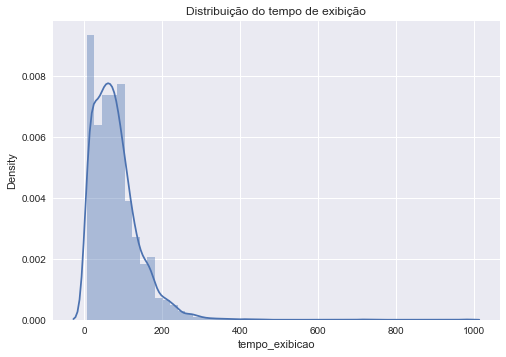

In [52]:
sns.distplot(df.tempo_exibicao).set_title("Distribuição do tempo de exibição")

<AxesSubplot:xlabel='renda', ylabel='tempo_exibicao'>

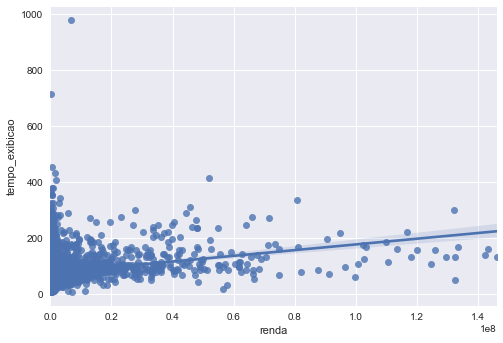

In [53]:
sns.regplot(data=df, x='renda', y='tempo_exibicao')

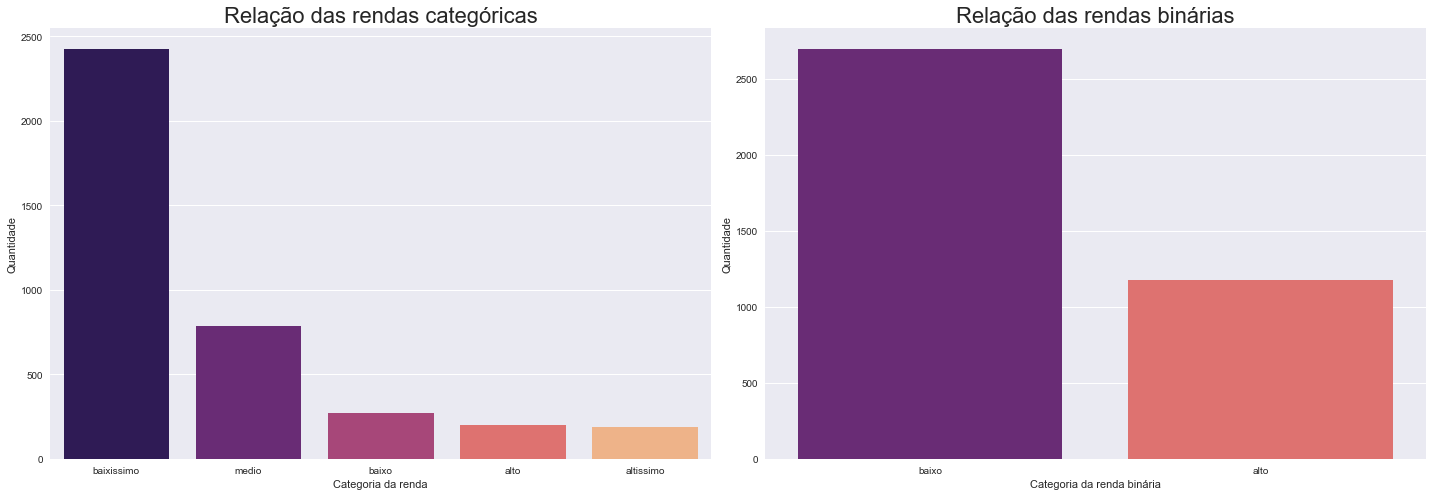

In [54]:
fig, axes = plt.subplots(1, 2, figsize = (20, 7)) 

sns.countplot(ax = axes[0],
              data = df,
              x = 'rendacat',
              order = df['rendacat'].value_counts().index,
              palette = 'magma').set_title('Relação das rendas categóricas', fontsize = 22, fontweight = 200)
axes[0].set_xlabel('Categoria da renda')
axes[0].set_ylabel('Quantidade')


sns.countplot(ax = axes[1],
              data = df,
              x = 'rendabinaria',
              order = df['rendabinaria'].value_counts().index,
              palette = 'magma').set_title('Relação das rendas binárias', fontsize = 22, fontweight = 200)
axes[1].set_xlabel('Categoria da renda binária')
axes[1].set_ylabel('Quantidade')

plt.tight_layout()
plt.show()

In [55]:
df['tempo_exibicao'].describe()

count   3870.000
mean      79.312
std       59.764
min        6.000
25%       36.000
50%       72.000
75%      108.000
max      978.000
Name: tempo_exibicao, dtype: float64

72 dias é a mediana

In [56]:
# divisão do tempo de exibição em Longo e Curto
df['divisao_tempo_exibicao'] = df['tempo_exibicao']

divisao = []
for i in df['tempo_exibicao']:
    if i <= 72:
        divisao.append(0)
    else:
        divisao.append(1)
        
df['divisao_tempo_exibicao'] = divisao
df

,titulo_original,publico,tempo_exibicao,renda,salas,ano_cinematografico,razao_social_distribuidora,genero,internacional_nacional,preco_medio_ingresso,distribuidoras2,rendacat,rendabinaria,divisao_tempo_exibicao
0,OS DEZ MANDAMENTOS,11305479,222,116833026.880,7319,2016,SM DISTRIBUIDORA DE FILMES LTDA,Ficção,1,10.334,media,altissimo,alto,1
1,TROPA DE ELITE 2,11146723,168,103461153.740,6240,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Ficção,1,9.282,major,altissimo,alto,1
2,THE AVENGERS,10911371,132,129595590.000,6693,2012,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Ficção,0,11.877,major,altissimo,alto,1
3,THE AVENGERS: AGE OF ULTRON,10129071,132,146184931.000,7881,2015,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Ficção,0,14.432,major,altissimo,alto,1
4,FURIOUS SEVEN,9857968,138,142466037.020,5961,2016,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,Ficção,0,14.452,media,altissimo,alto,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,OUR BRAND IS CRISIS,4,12,34.500,2,2009,VIDEOFILMES PRODUÇÕES ARTÍSTICA LTDA,Não Classificada,0,8.625,menores,baixissimo,baixo,0
3866,PAULINHO DA VIOLA - MEU TEMPO É HOJE,3,6,24.000,1,2013,VIDEOFILMES PRODUÇÕES ARTÍSTICA LTDA,Documentário,1,8.000,menores,baixissimo,baixo,0
3867,HOODWINKED,2,6,10.000,1,2009,CANNES PRODUÇÕES S/A,Animação,0,5.000,media,baixissimo,baixo,0
3868,"CONCEPÇÃO, A",1,6,3.000,1,2009,RESERVA NACIONAL DISTRIBUIDORA DE FILMES LTDA.,Ficção,1,3.000,menores,baixissimo,baixo,0


In [57]:
df['divisao_tempo_exibicao'].value_counts()

0    2108
1    1762
Name: divisao_tempo_exibicao, dtype: int64

In [58]:
df["internacional_nacional"] = df["internacional_nacional"].replace({
      0 : "Internacional"
    , 1 : "Nacional"
})
df.head(3)

,titulo_original,publico,tempo_exibicao,renda,salas,ano_cinematografico,razao_social_distribuidora,genero,internacional_nacional,preco_medio_ingresso,distribuidoras2,rendacat,rendabinaria,divisao_tempo_exibicao
0,OS DEZ MANDAMENTOS,11305479,222,116833026.880,7319,2016,SM DISTRIBUIDORA DE FILMES LTDA,Ficção,Nacional,10.334,media,altissimo,alto,1
1,TROPA DE ELITE 2,11146723,168,103461153.740,6240,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Ficção,Nacional,9.282,major,altissimo,alto,1
2,THE AVENGERS,10911371,132,129595590.000,6693,2012,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Ficção,Internacional,11.877,major,altissimo,alto,1


In [59]:
dftempo = df.groupby('titulo_original')['tempo_exibicao'].sum()
dftempo = dftempo.reset_index(name = 'tempo_exibicao')
dftempo = dftempo.sort_values(by = 'tempo_exibicao', ascending = False)
dftempo = dftempo.head(20)
dftempo.head

<bound method NDFrame.head of                           titulo_original  tempo_exibicao
2725                     RELATOS SALVAJES             978
711                                COEURS             714
2363                   O MENINO E O MUNDO             455
1828                     LE PETIT NICOLAS             432
1229                               FROZEN             413
2348  O GRILO FELIZ E OS INSETOS GIGANTES             408
663              CHERRY BLOSSOMS - HANAMI             378
1879                 LET THE RIGHT ONE IN             378
3654                        UNDER THE SEA             360
3717                              VINCERE             354
3087                             TATUAGEM             353
3636                      UN CUENTO CHINO             342
875                       DESPICABLE ME 2             336
1774                    LA TÊTE EN FRICHE             324
3360                          THE NUT JOB             324
1873                          LES TEMOINS 

In [60]:
plt.rcParams['figure.figsize'] = (12, 7)

Text(0.5, 1.0, 'Nome dos filmes que mais ficaram em exibição')

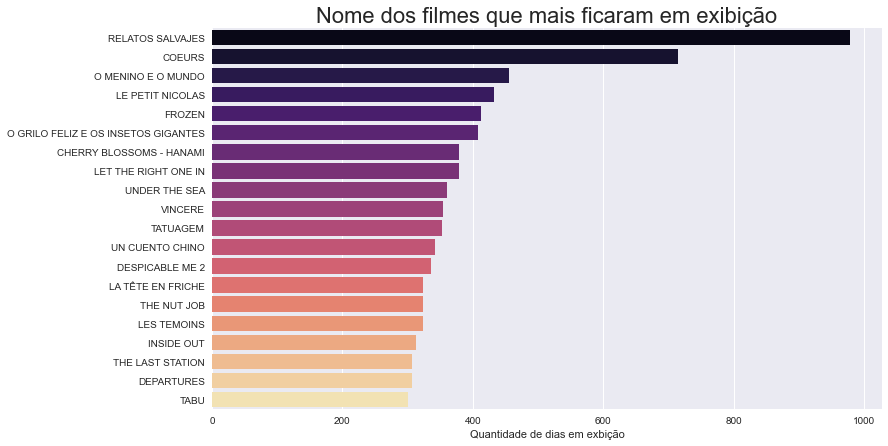

In [61]:
sns.barplot(data = dftempo,
            x = 'tempo_exibicao',
            y = 'titulo_original',
            palette = 'magma')
plt.xlabel('Quantidade de dias em exbição')
plt.ylabel('')
plt.title('Nome dos filmes que mais ficaram em exibição', fontsize = 22, fontweight = 200)

In [62]:
# Separando os datasets

df_animacao = df.loc[df['genero'] == 'Animação']
df_ficcao = df.loc[df['genero'] == 'Ficção']

In [63]:
# Separação pelo tempo em exibição

df_animacao_tempo = df_animacao.sort_values(by ='tempo_exibicao', ascending = False)
df_animacao_tempo = df_animacao_tempo.head(20)

df_ficcao_tempo = df_ficcao.sort_values(by ='tempo_exibicao', ascending = False)
df_ficcao_tempo = df_ficcao_tempo.head(20)

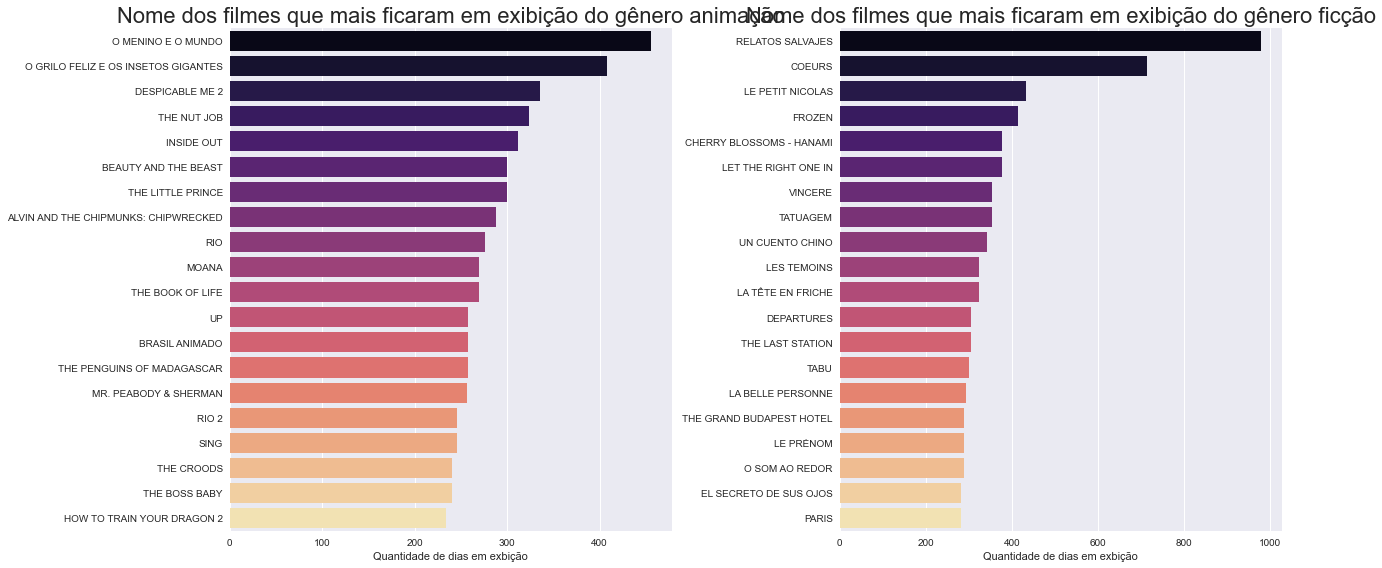

In [64]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8)) 

sns.barplot(ax = axes[0],
            data = df_animacao_tempo,
            x = 'tempo_exibicao',
            y = 'titulo_original',
            palette = 'magma').set_title("Nome dos filmes que mais ficaram em exibição do gênero animação", fontsize = 22, fontweight = 200)
axes[0].set_xlabel('Quantidade de dias em exbição')
axes[0].set_ylabel('')

sns.barplot(ax = axes[1],
            data = df_ficcao_tempo,
            x = 'tempo_exibicao',
            y = 'titulo_original',
            palette = 'magma').set_title("Nome dos filmes que mais ficaram em exibição do gênero ficção", fontsize = 22, fontweight = 200)
axes[1].set_xlabel('Quantidade de dias em exbição')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [65]:
# Separação pela renda

df_animacao_renda = df_animacao.sort_values(by ='renda', ascending = False)
df_animacao_renda = df_animacao_renda.head(20)

df_ficcao_renda = df_ficcao.sort_values(by ='renda', ascending = False)
df_ficcao_renda = df_ficcao_renda.head(20)

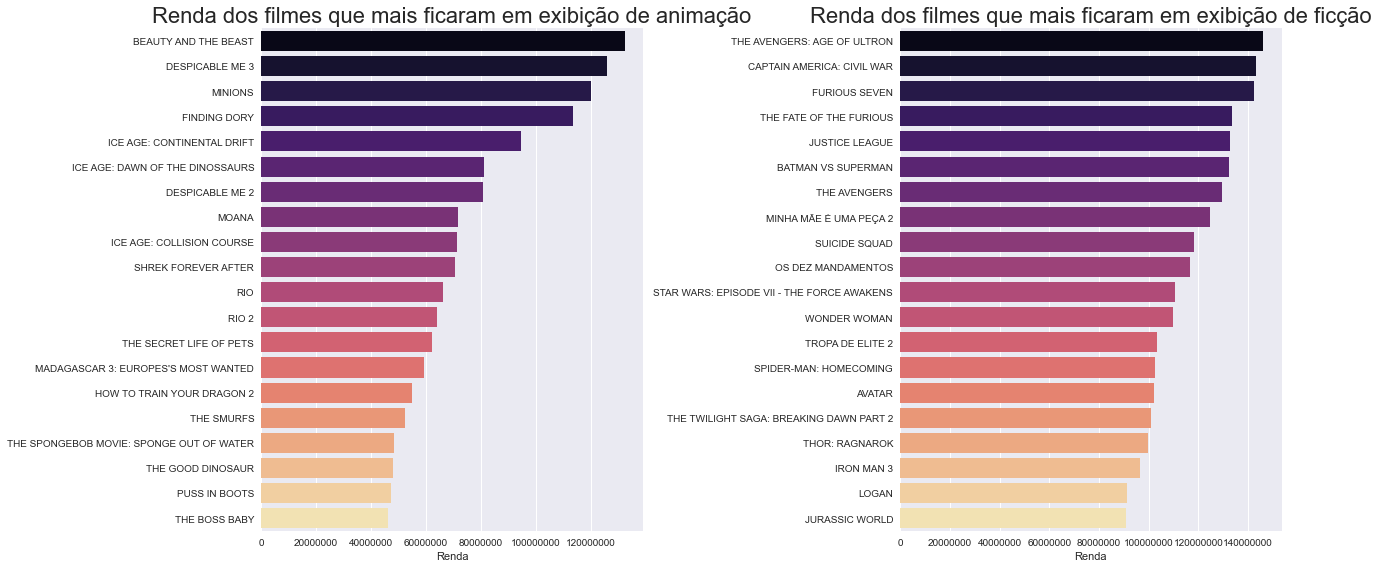

In [66]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8)) 

sns.barplot(ax = axes[0],
            data = df_animacao_renda,
            x = 'renda',
            y = 'titulo_original',
            palette = 'magma').set_title("Renda dos filmes que mais ficaram em exibição de animação", fontsize = 22, fontweight = 200)
axes[0].set_xlabel('Renda')
axes[0].set_ylabel('')
axes[0].ticklabel_format(axis = "x", style = 'plain')

sns.barplot(ax = axes[1],
            data = df_ficcao_renda,
            x = 'renda',
            y = 'titulo_original',
            palette = 'magma').set_title("Renda dos filmes que mais ficaram em exibição de ficção", fontsize = 22, fontweight = 200)
axes[1].set_xlabel('Renda')
axes[1].set_ylabel('')
axes[1].ticklabel_format(axis = "x", style = 'plain')

plt.tight_layout()
plt.show()

In [67]:
# Separando as distribuidoras mais exibidas

df_dist_exibidas_animacao = df_animacao.groupby('razao_social_distribuidora')['tempo_exibicao'].sum()
df_dist_exibidas_animacao = df_dist_exibidas_animacao.reset_index(name = 'tempo_exibicao')
df_dist_exibidas_animacao = df_dist_exibidas_animacao.sort_values(by = 'tempo_exibicao', ascending = False)
df_dist_exibidas_animacao = df_dist_exibidas_animacao.head(20)

df_dist_exibidas_ficcao = df_ficcao.groupby('razao_social_distribuidora')['tempo_exibicao'].sum()
df_dist_exibidas_ficcao = df_dist_exibidas_ficcao.reset_index(name = 'tempo_exibicao')
df_dist_exibidas_ficcao = df_dist_exibidas_ficcao.sort_values(by = 'tempo_exibicao', ascending = False)
df_dist_exibidas_ficcao = df_dist_exibidas_ficcao.head(20)

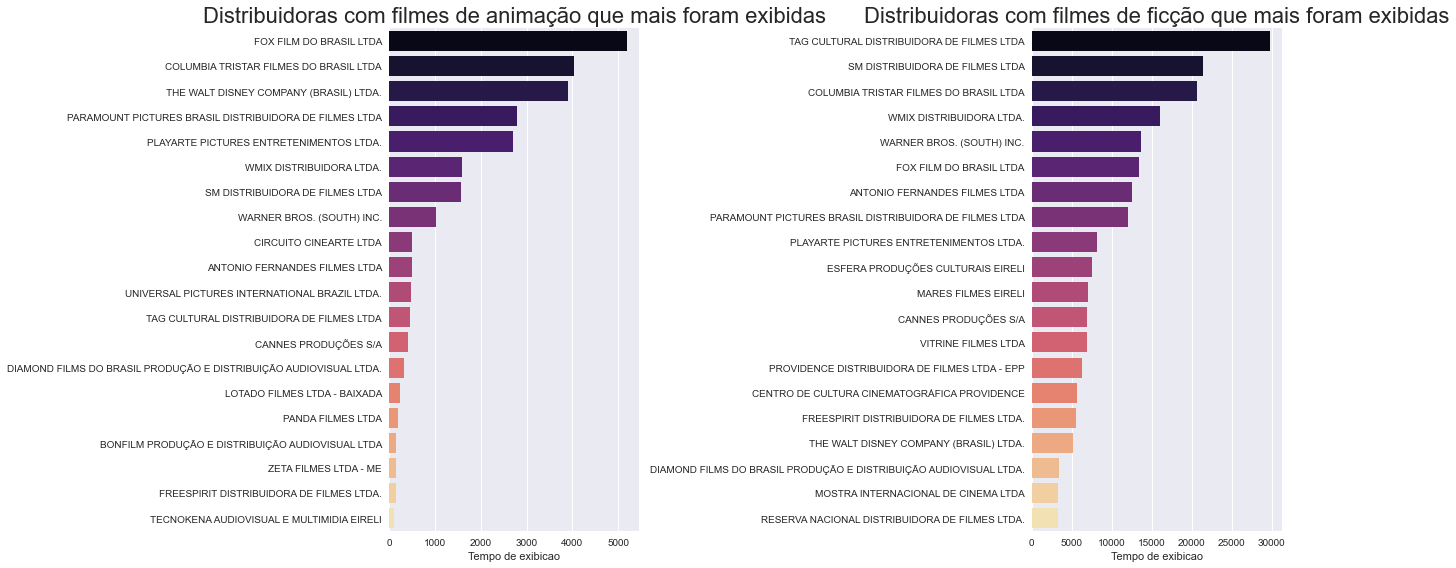

In [68]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8)) 

sns.barplot(ax = axes[0],
            data = df_dist_exibidas_animacao,
            x = 'tempo_exibicao',
            y = 'razao_social_distribuidora',
            palette = 'magma').set_title("Distribuidoras com filmes de animação que mais foram exibidas", fontsize = 22, fontweight = 200)
axes[0].set_xlabel('Tempo de exibicao')
axes[0].set_ylabel('')
axes[0].ticklabel_format(axis = "x", style = 'plain')

sns.barplot(ax = axes[1],
            data = df_dist_exibidas_ficcao,
            x = 'tempo_exibicao',
            y = 'razao_social_distribuidora',
            palette = 'magma').set_title("Distribuidoras com filmes de ficção que mais foram exibidas", fontsize = 22, fontweight = 200)
axes[1].set_xlabel('Tempo de exibicao')
axes[1].set_ylabel('')
axes[1].ticklabel_format(axis = "x", style = 'plain')

plt.tight_layout()
plt.show()

In [69]:
# Separando as distribuidoras mais rentaveis

df_dist_rentaveis_animacao = df_animacao.groupby('razao_social_distribuidora')['renda'].sum()
df_dist_rentaveis_animacao = df_dist_rentaveis_animacao.reset_index(name = 'renda')
df_dist_rentaveis_animacao = df_dist_rentaveis_animacao.sort_values(by = 'renda', ascending = False)
df_dist_rentaveis_animacao = df_dist_rentaveis_animacao.head(10)

df_dist_rentaveis_ficcao = df_ficcao.groupby('razao_social_distribuidora')['renda'].sum()
df_dist_rentaveis_ficcao = df_dist_rentaveis_ficcao.reset_index(name = 'renda')
df_dist_rentaveis_ficcao = df_dist_rentaveis_ficcao.sort_values(by = 'renda', ascending = False)
df_dist_rentaveis_ficcao = df_dist_rentaveis_ficcao.head(10)

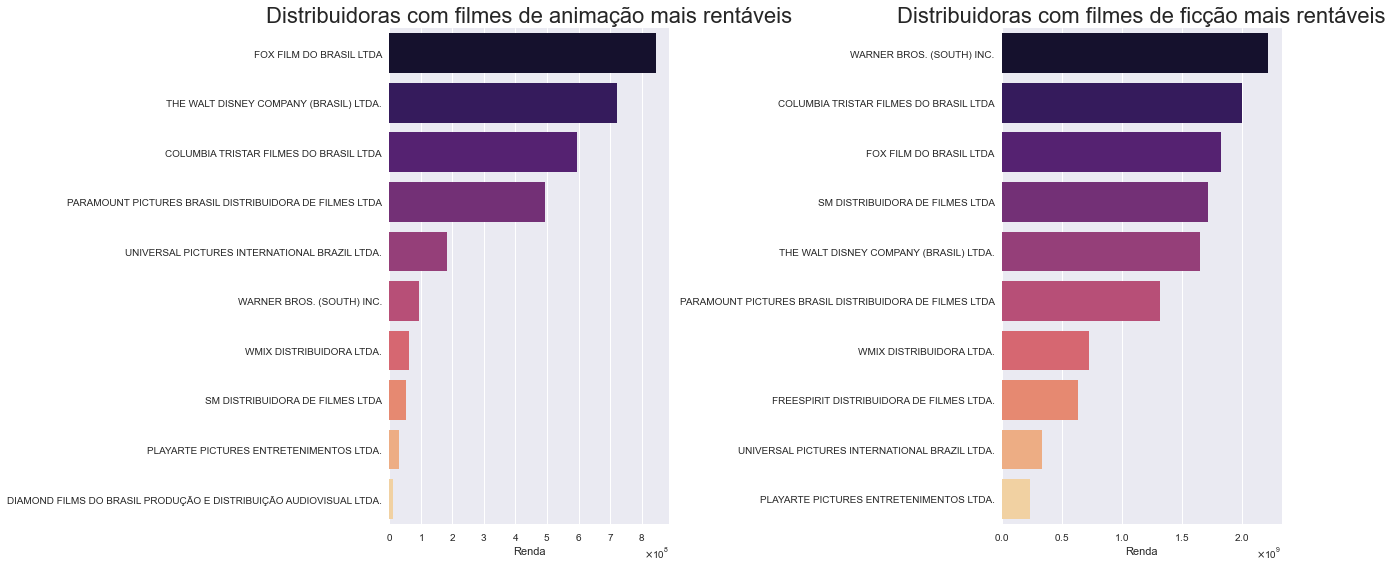

In [70]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8)) 

sns.barplot(ax = axes[0],
            data = df_dist_rentaveis_animacao,
            x = 'renda',
            y = 'razao_social_distribuidora',
            palette = 'magma').set_title("Distribuidoras com filmes de animação mais rentáveis", fontsize = 22, fontweight = 200)
axes[0].set_xlabel('Renda')
axes[0].set_ylabel('')
axes[0].ticklabel_format(axis = "x", useMathText = True)

sns.barplot(ax = axes[1],
            data = df_dist_rentaveis_ficcao,
            x = 'renda',
            y = 'razao_social_distribuidora',
            palette = 'magma').set_title("Distribuidoras com filmes de ficção mais rentáveis", fontsize = 22, fontweight = 200)
axes[1].set_xlabel('Renda')
axes[1].set_ylabel('')
axes[1].ticklabel_format(axis = "x", useMathText = True)

plt.tight_layout()
plt.show()

**Transformando variável target em categórica; criação de variável de divisao de renda**

In [71]:
len(df.loc[(df.tempo_exibicao >= 500)])

2

In [72]:
df = df.loc[(df.tempo_exibicao <= 500)]

Text(0.5, 1.0, 'Distribuição do tempo de exibição (depois da remoção de outliers)')

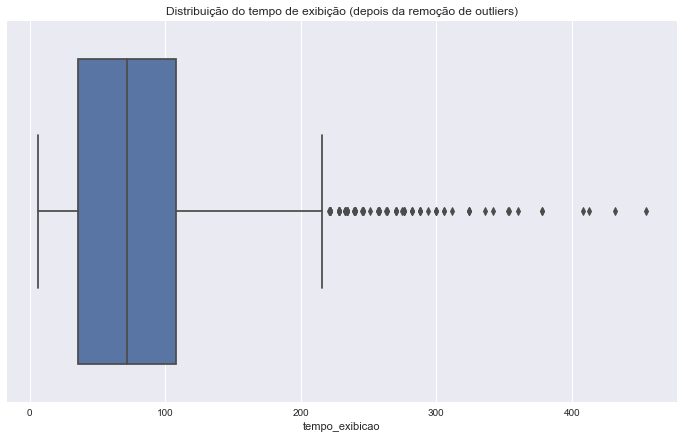

In [73]:
sns.boxplot(df.tempo_exibicao).set_title("Distribuição do tempo de exibição (depois da remoção de outliers)")

In [74]:
df['divisao_label'] = df['divisao_tempo_exibicao'].replace({
    0: "Curto",
    1: "Longo"
})
df.head(2)

,titulo_original,publico,tempo_exibicao,renda,salas,ano_cinematografico,razao_social_distribuidora,genero,internacional_nacional,preco_medio_ingresso,distribuidoras2,rendacat,rendabinaria,divisao_tempo_exibicao,divisao_label
0,OS DEZ MANDAMENTOS,11305479,222,116833026.880,7319,2016,SM DISTRIBUIDORA DE FILMES LTDA,Ficção,Nacional,10.334,media,altissimo,alto,1,Longo
1,TROPA DE ELITE 2,11146723,168,103461153.740,6240,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Ficção,Nacional,9.282,major,altissimo,alto,1,Longo


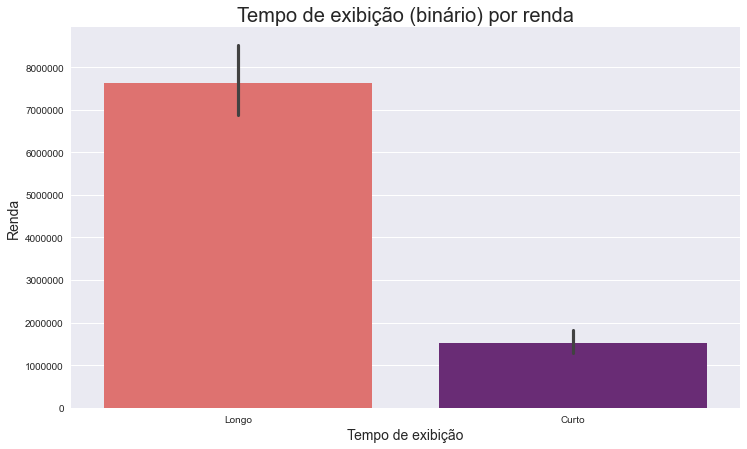

In [75]:
sns.barplot(x = 'divisao_label', y='renda', data = df, palette='magma_r')
plt.title('Tempo de exibição (binário) por renda', fontsize = 20)
plt.xlabel('Tempo de exibição', fontsize = 14)
plt.ylabel('Renda', fontsize = 14)
plt.ticklabel_format(style='plain', axis='y')

Text(0, 0.5, 'Distribuidora')

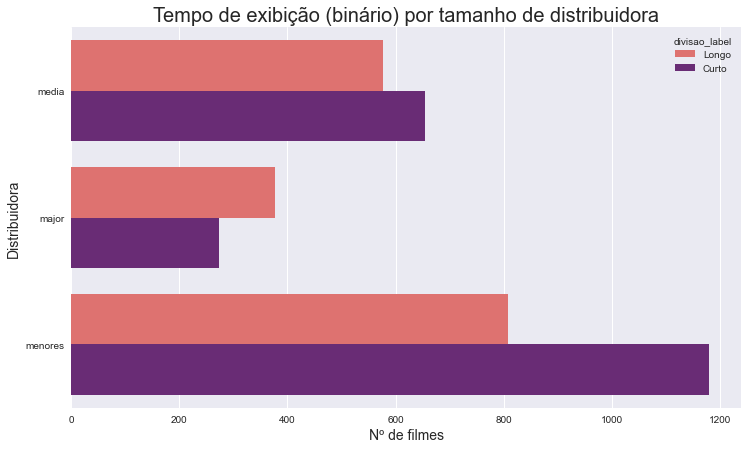

In [76]:
sns.countplot(y="distribuidoras2", data=df, hue='divisao_label', palette='magma_r')
plt.title('Tempo de exibição (binário) por tamanho de distribuidora', fontsize = 20)
plt.xlabel('Nº de filmes', fontsize = 14)
plt.ylabel('Distribuidora', fontsize = 14)

Text(0, 0.5, 'Gênero')

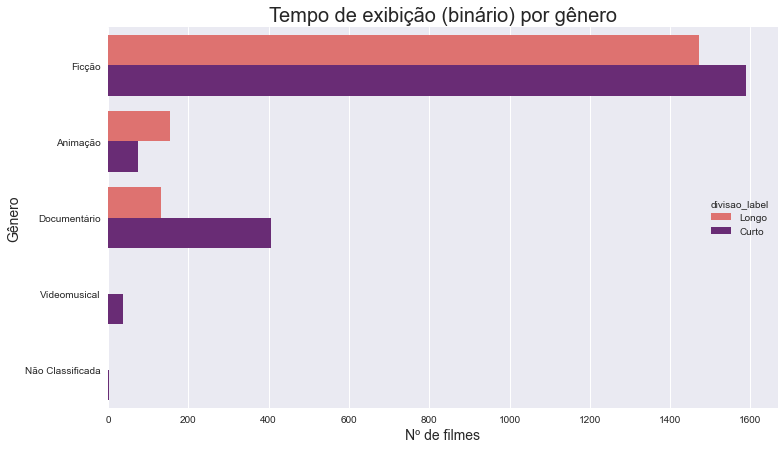

In [77]:
sns.countplot(y="genero", data=df, hue='divisao_label', palette='magma_r')
plt.title('Tempo de exibição (binário) por gênero', fontsize = 20)
plt.xlabel('Nº de filmes', fontsize = 14)
plt.ylabel('Gênero', fontsize = 14)

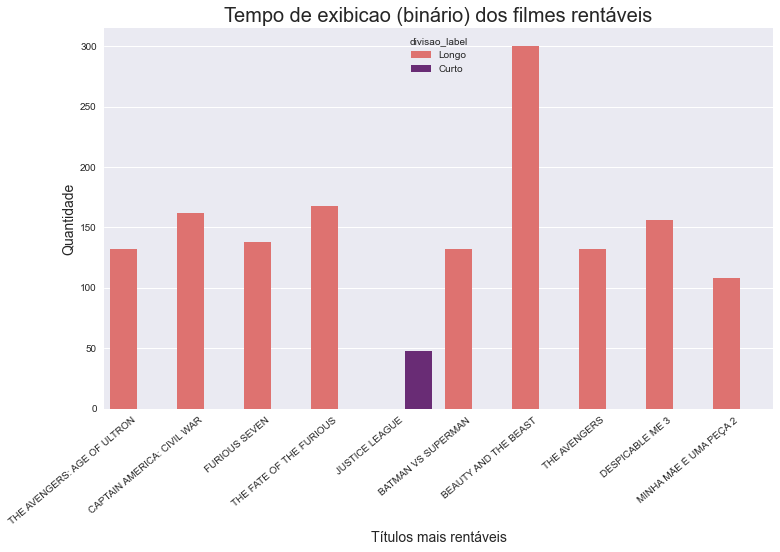

In [78]:
df= df.sort_values(by ='renda', ascending=False)
df2=df.head(10)
ax= sns.barplot(x= 'titulo_original', y='tempo_exibicao', data=df2, hue='divisao_label', palette='magma_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Títulos mais rentáveis', fontsize = 14)
plt.ylabel('Quantidade', fontsize = 14)

plt.title('Tempo de exibicao (binário) dos filmes rentáveis', fontsize = 20)
plt.show()

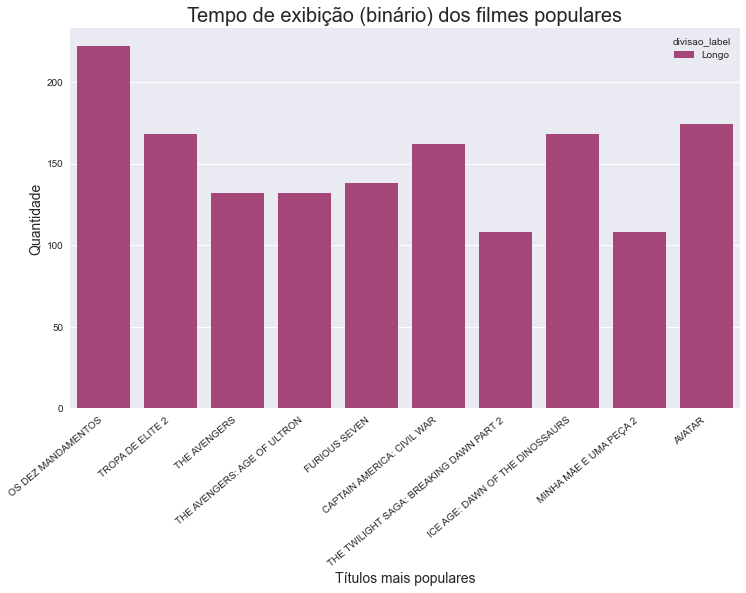

In [79]:
df= df.sort_values(by ='publico', ascending=False)
df2=df.head(10)
ax= sns.barplot(x= 'titulo_original', y='tempo_exibicao', data=df2, hue='divisao_label', palette='magma_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Títulos mais populares', fontsize = 14)
plt.ylabel('Quantidade', fontsize = 14)

plt.title('Tempo de exibição (binário) dos filmes populares', fontsize = 20)
plt.show()

In [80]:
df.head()

,titulo_original,publico,tempo_exibicao,renda,salas,ano_cinematografico,razao_social_distribuidora,genero,internacional_nacional,preco_medio_ingresso,distribuidoras2,rendacat,rendabinaria,divisao_tempo_exibicao,divisao_label
0,OS DEZ MANDAMENTOS,11305479,222,116833026.880,7319,2016,SM DISTRIBUIDORA DE FILMES LTDA,Ficção,Nacional,10.334,media,altissimo,alto,1,Longo
1,TROPA DE ELITE 2,11146723,168,103461153.740,6240,2011,ZAZEN PRODUÇÕES AUDIOVISUAIS LTDA.,Ficção,Nacional,9.282,major,altissimo,alto,1,Longo
2,THE AVENGERS,10911371,132,129595590.000,6693,2012,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Ficção,Internacional,11.877,major,altissimo,alto,1,Longo
3,THE AVENGERS: AGE OF ULTRON,10129071,132,146184931.000,7881,2015,THE WALT DISNEY COMPANY (BRASIL) LTDA.,Ficção,Internacional,14.432,major,altissimo,alto,1,Longo
4,FURIOUS SEVEN,9857968,138,142466037.020,5961,2016,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,Ficção,Internacional,14.452,media,altissimo,alto,1,Longo


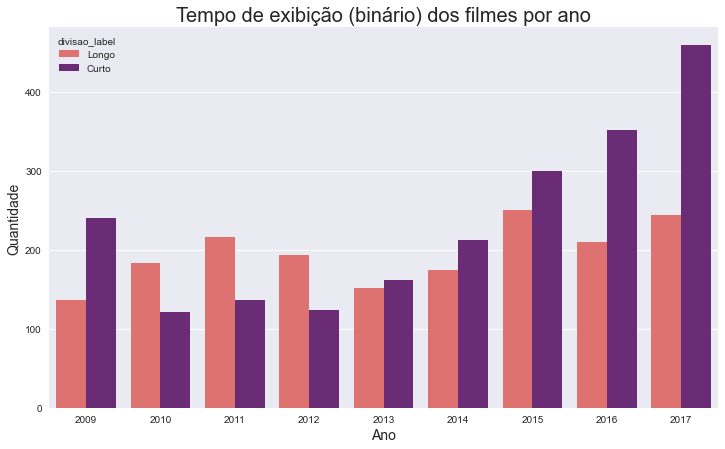

In [81]:
sns.countplot(x='ano_cinematografico', data = df, hue='divisao_label', palette='magma_r')
plt.title('Tempo de exibição (binário) dos filmes por ano', fontsize = 20)
plt.xlabel('Ano', fontsize = 14)
plt.ylabel('Quantidade', fontsize = 14)
plt.ticklabel_format(style='plain', axis='y')

Text(0.5, 1.0, 'Tempo de exibição (binário) de filmes nacionais e internacionais')

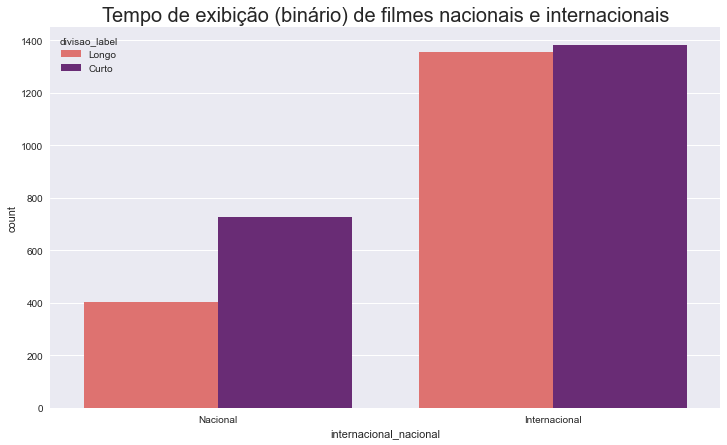

In [82]:
sns.countplot(x='internacional_nacional', data = df, hue='divisao_label', palette='magma_r')
plt.title('Tempo de exibição (binário) de filmes nacionais e internacionais', fontsize = 20)

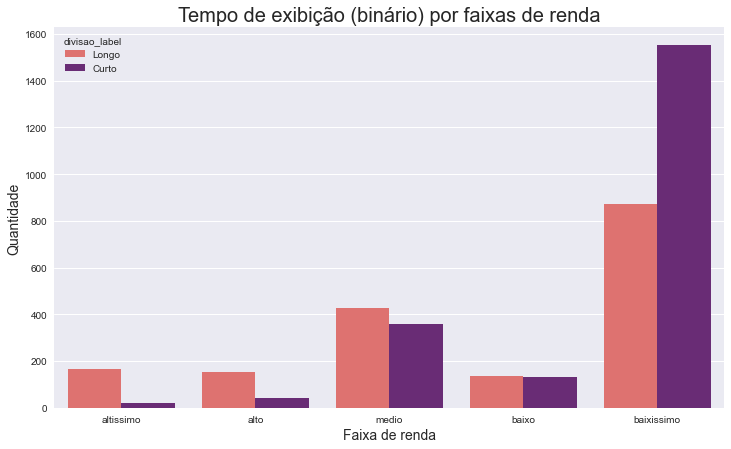

In [83]:
sns.countplot(x='rendacat', data = df, hue='divisao_label', palette='magma_r')
plt.title('Tempo de exibição (binário) por faixas de renda', fontsize = 20)
plt.xlabel('Faixa de renda', fontsize = 14)
plt.ylabel('Quantidade', fontsize = 14)
plt.ticklabel_format(style='plain', axis='y')

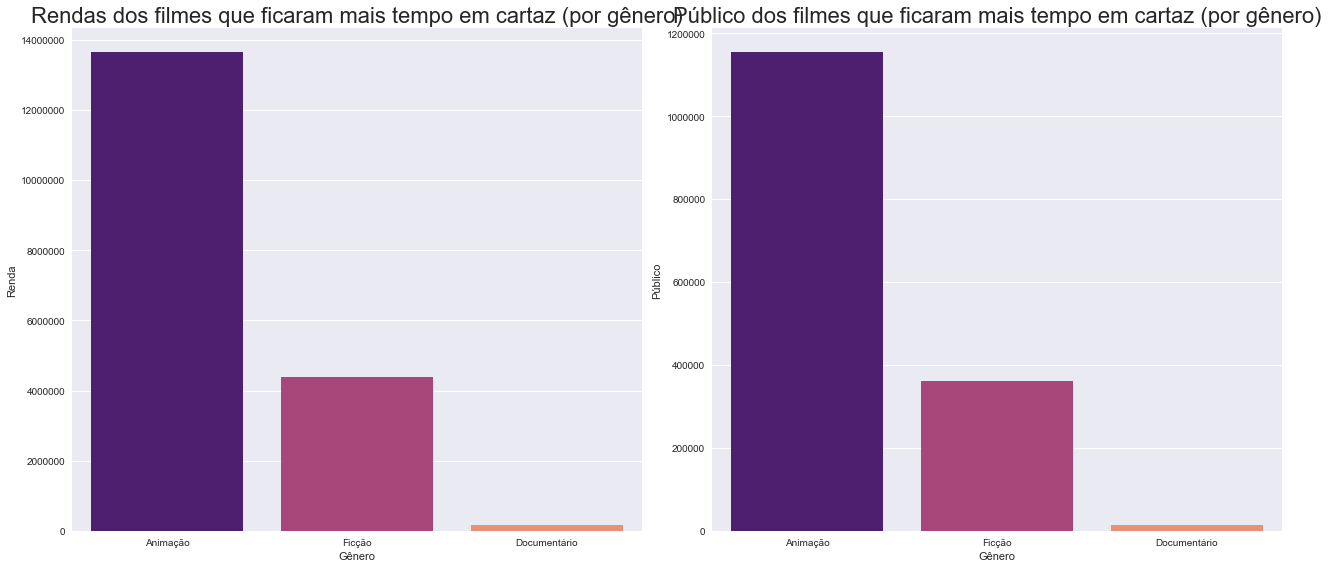

In [84]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8)) 

sns.barplot(ax = axes[0],
            data = df,
            x = 'genero',
            order = ['Animação', 'Ficção', 'Documentário'],
            y = 'renda',
            ci = None,
            palette = 'magma').set_title("Rendas dos filmes que ficaram mais tempo em cartaz (por gênero)", fontsize = 22, fontweight = 200)
axes[0].set_xlabel('Gênero')
axes[0].set_ylabel('Renda')
axes[0].ticklabel_format(axis = "y", style = 'plain')

sns.barplot(ax = axes[1],
            data = df,
            x = 'genero',
            order = ['Animação', 'Ficção', 'Documentário'],
            y = 'publico',
            ci = None,
            palette = 'magma').set_title("Público dos filmes que ficaram mais tempo em cartaz (por gênero)", fontsize = 22, fontweight = 200)
axes[1].ticklabel_format(axis = "y", style = 'plain')
axes[1].set_xlabel('Gênero')
axes[1].set_ylabel('Público')

plt.tight_layout()
plt.show()

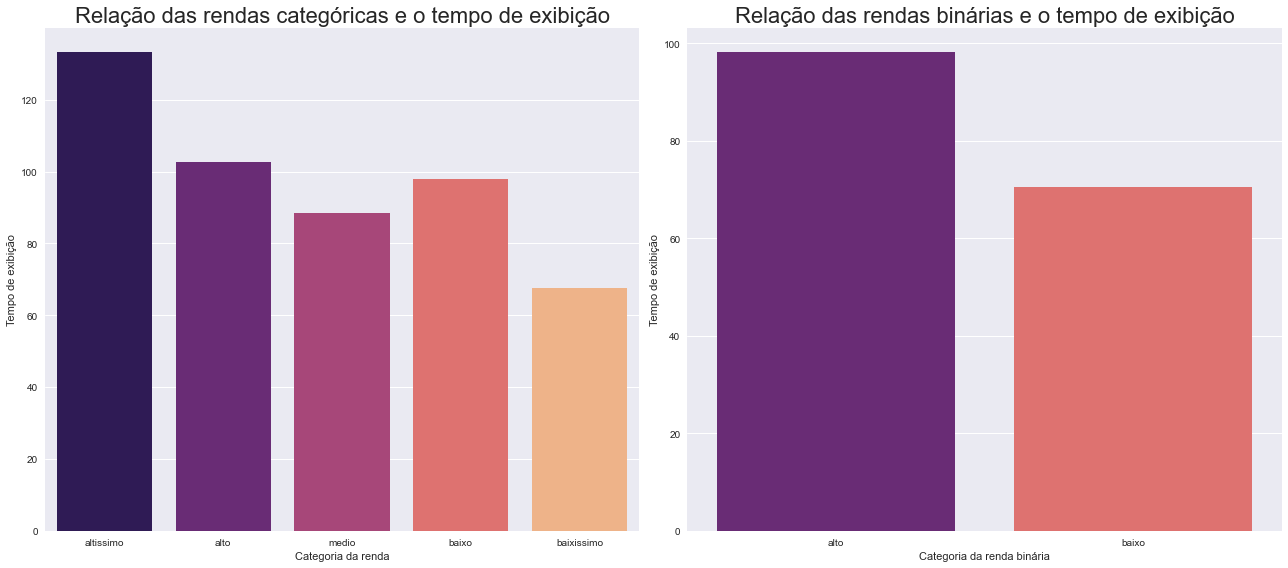

In [85]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8)) 

sns.barplot(ax = axes[0],
            data = df,
            x = 'rendacat',
            y = 'tempo_exibicao',
            ci = None,
            palette = 'magma').set_title('Relação das rendas categóricas e o tempo de exibição', fontsize = 22, fontweight = 200)
axes[0].set_xlabel('Categoria da renda')
axes[0].set_ylabel('Tempo de exibição')


sns.barplot(ax = axes[1],
            data = df,
            x = 'rendabinaria',
            y = 'tempo_exibicao',
            ci = None,
            palette = 'magma').set_title('Relação das rendas binárias e o tempo de exibição', fontsize = 22, fontweight = 200)
axes[1].set_xlabel('Categoria da renda binária')
axes[1].set_ylabel('Tempo de exibição')

plt.tight_layout()
plt.show()

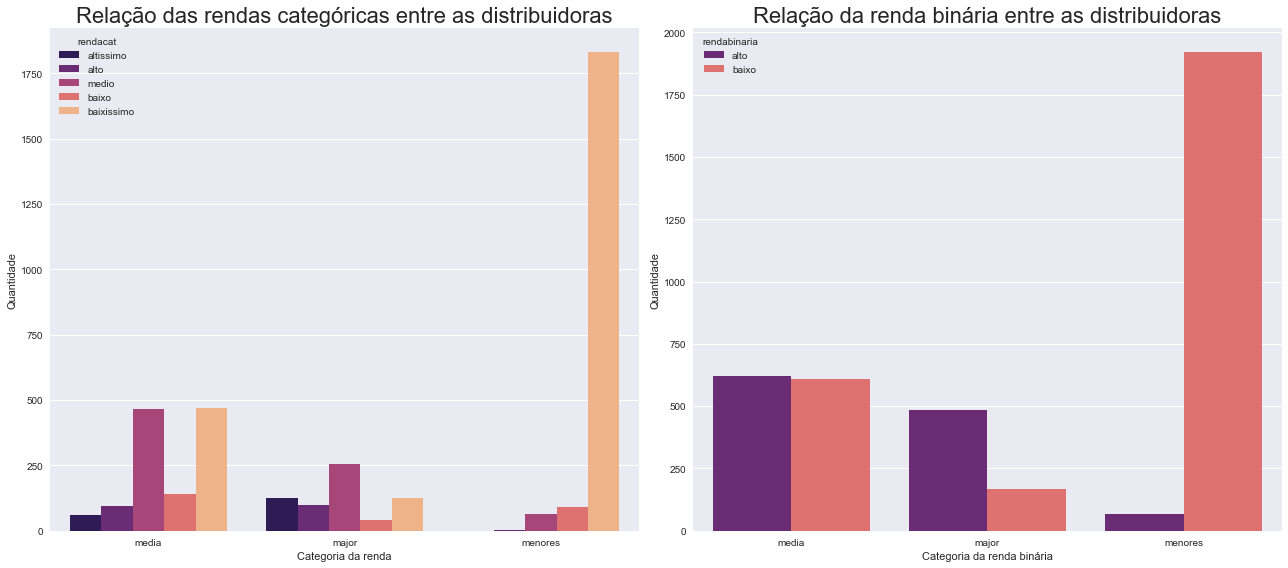

In [86]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8)) 

sns.countplot(ax = axes[0],
              data = df,
              x = 'distribuidoras2',
              hue = 'rendacat',
              palette = 'magma').set_title('Relação das rendas categóricas entre as distribuidoras', fontsize = 22, fontweight = 200)
axes[0].set_xlabel('Categoria da renda')
axes[0].set_ylabel('Quantidade')


sns.countplot(ax = axes[1],
              data = df,
              x = 'distribuidoras2',
              hue = 'rendabinaria',
              palette = 'magma').set_title('Relação da renda binária entre as distribuidoras', fontsize = 22, fontweight = 200)
axes[1].set_xlabel('Categoria da renda binária')
axes[1].set_ylabel('Quantidade')

plt.tight_layout()

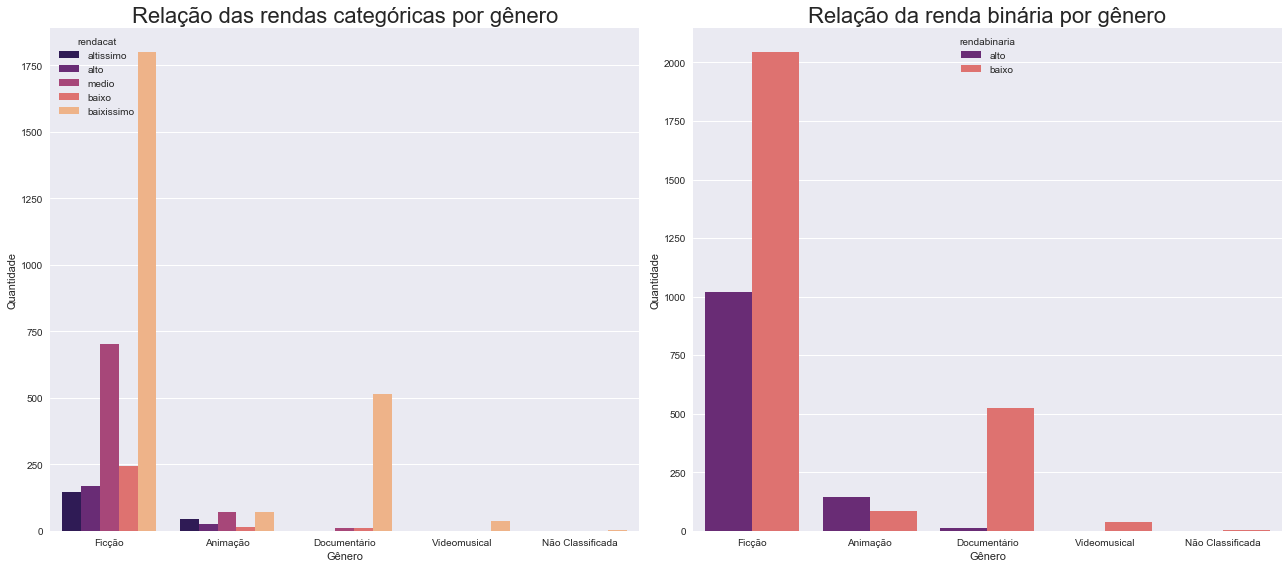

In [87]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8)) 

sns.countplot(ax = axes[0],
              data = df,
              x = 'genero',
              hue = 'rendacat',
              palette = 'magma').set_title('Relação das rendas categóricas por gênero', fontsize = 22, fontweight = 200)
axes[0].set_xlabel('Gênero')
axes[0].set_ylabel('Quantidade')


sns.countplot(ax = axes[1],
              data = df,
              x = 'genero',
              hue = 'rendabinaria',
              palette = 'magma').set_title('Relação da renda binária por gênero', fontsize = 22, fontweight = 200)
axes[1].set_xlabel('Gênero')
axes[1].set_ylabel('Quantidade')

plt.tight_layout()

# Feature Engineering

In [88]:
df2 = df.copy(deep = True)

In [89]:
encoder = LabelEncoder()
df2['genero'] = encoder.fit_transform(df2['genero'])

In [90]:
df2['razao_social_distribuidora'] = encoder.fit_transform(df2['razao_social_distribuidora'])

In [91]:
df2['internacional_nacional'] = encoder.fit_transform(df2['internacional_nacional'])

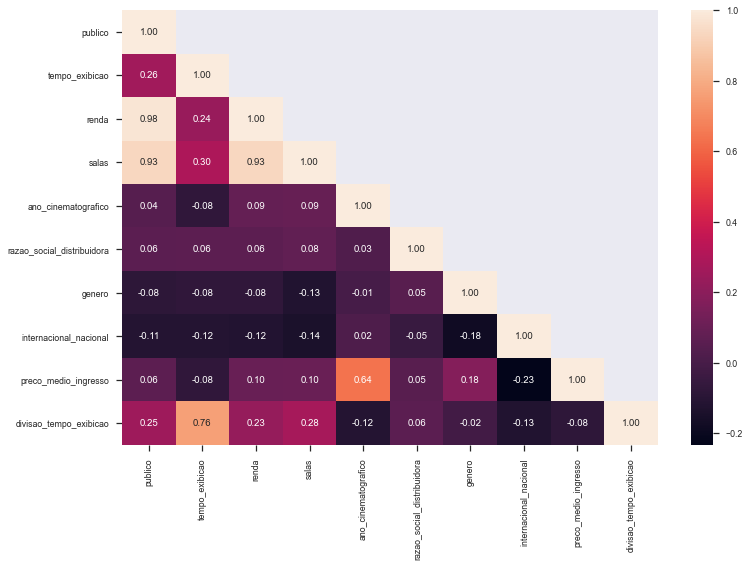

In [92]:
corr = df2.corr()
sns.set_context("notebook", font_scale=0.8, rc={"lines.linewidth": 1.5})
plt.figure(figsize=(12,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

In [93]:
df2.isna().sum()

titulo_original               0
publico                       0
tempo_exibicao                0
renda                         0
salas                         0
ano_cinematografico           0
razao_social_distribuidora    0
genero                        0
internacional_nacional        0
preco_medio_ingresso          1
distribuidoras2               0
rendacat                      0
rendabinaria                  0
divisao_tempo_exibicao        0
divisao_label                 0
dtype: int64

In [94]:
df2.dropna(axis =0, subset = ['preco_medio_ingresso'], inplace=True)

In [95]:
df2.drop(columns=['renda', 'publico', 'tempo_exibicao'], axis=1, inplace=True)

In [96]:
df2.head()

,titulo_original,salas,ano_cinematografico,razao_social_distribuidora,genero,internacional_nacional,preco_medio_ingresso,distribuidoras2,rendacat,rendabinaria,divisao_tempo_exibicao,divisao_label
0,OS DEZ MANDAMENTOS,7319,2016,230,2,1,10.334,media,altissimo,alto,1,Longo
1,TROPA DE ELITE 2,6240,2011,270,2,1,9.282,major,altissimo,alto,1,Longo
2,THE AVENGERS,6693,2012,242,2,0,11.877,major,altissimo,alto,1,Longo
3,THE AVENGERS: AGE OF ULTRON,7881,2015,242,2,0,14.432,major,altissimo,alto,1,Longo
4,FURIOUS SEVEN,5961,2016,67,2,0,14.452,media,altissimo,alto,1,Longo


# Regressão Logística

In [97]:
X = pd.DataFrame(columns=['genero', 'salas', 'preco_medio_ingresso', 'internacional_nacional',
         'razao_social_distribuidora','ano_cinematografico'], data=df2)

In [98]:
y = pd.DataFrame(columns=['divisao_tempo_exibicao'], data=df2)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [100]:
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [101]:
logit =LogisticRegression(verbose=1, max_iter=1000)
logit.fit(X_train,np.ravel(y_train,order='C'))
y_pred=logit.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [102]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,

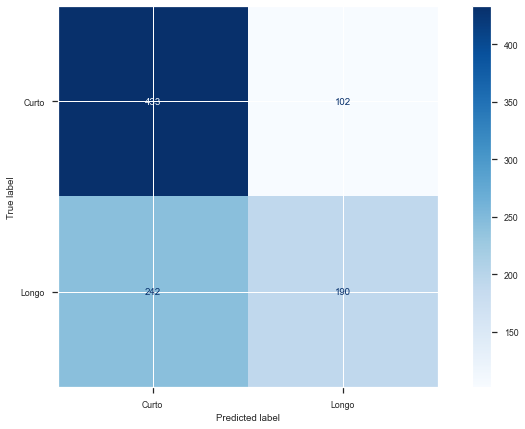

In [103]:
cnf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cnf_matrix, display_labels=['Curto', 'Longo'])
disp.plot(cmap='Blues')

In [104]:
print(classification_report(y_test, y_pred, target_names=['Curto', 'Longo']))

              precision    recall  f1-score   support

       Curto       0.64      0.81      0.72       535
       Longo       0.65      0.44      0.52       432

    accuracy                           0.64       967
   macro avg       0.65      0.62      0.62       967
weighted avg       0.65      0.64      0.63       967



# Decision Tree, XGBoost, Random Forest Classifier

In [105]:
df3 = df.copy(deep = True)

In [106]:
df3['genero'] = encoder.fit_transform(df['genero'])
df3['razao_social_distribuidora'] = encoder.fit_transform(df['razao_social_distribuidora'])
df3['internacional_nacional'] = encoder.fit_transform(df['internacional_nacional'])

In [107]:
df3.dropna(axis =0, subset = ['preco_medio_ingresso'], inplace=True)

In [108]:
df3.drop(columns=['renda', 'publico', 'tempo_exibicao'], axis=1, inplace=True)

# Decision Tree

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [110]:
scaler = StandardScaler()
df3 = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [111]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42, min_samples_split = 20, max_depth = 10)
xgb = XGBClassifier(random_state = 42, min_samples_leaf = 2, min_samples_split = 2, max_depth = 6, max_leaf_nodes = 2)
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42, min_samples_split = 20, max_depth = 10)

In [112]:
# Validação cruzada

scores_decision_tree = cross_val_score(dtc, X_train, y_train, cv = 5, scoring = 'f1') #cv=5 número de combinações
scores_decision_tree.mean().round(4)

0.7266

In [113]:
dtc.fit(X_train, y_train)

train_predictions = dtc.predict(X_train)
test_predictions = dtc.predict(X_test)

decision_tree = {'Teste': ['Acurácia', 'Recall', 'F1', 'ROC-AUC Score'],
                 'Decision Tree': [accuracy_score(y_test, test_predictions), recall_score(y_test, test_predictions), f1_score(y_test, test_predictions), roc_auc_score(y_test, test_predictions)]}
a = pd.DataFrame(data = decision_tree)

print(f'O F1 de treino é {f1_score(train_predictions, y_train).round(4)}')
print(f'O F1 de teste é {f1_score(test_predictions, y_test).round(4)}')

O F1 de treino é 0.8095
O F1 de teste é 0.7413


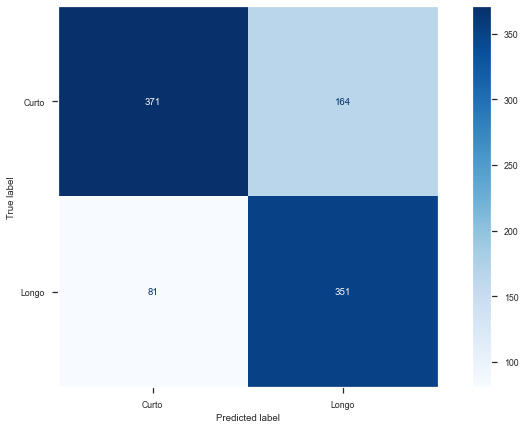

In [114]:
cnf_matrix = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(cnf_matrix, display_labels=['Curto', 'Longo'])
disp.plot(cmap = 'Blues')
plt.grid(False)

# XGBoost

In [115]:
scores_decision_tree = cross_val_score(xgb, X_train, y_train, cv = 5, scoring = 'f1')
scores_decision_tree.mean().round(4)

[19:28:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_leaf_nodes", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_leaf_nodes", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:28:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_relea

0.7562

In [116]:
xgb.fit(X_train, y_train)

train_predictions = xgb.predict(X_train)
test_predictions = xgb.predict(X_test)

xgboost = {'Teste': ['Acurácia', 'Recall', 'F1', 'ROC-AUC Score'],
           'XGBoost': [accuracy_score(y_test, test_predictions), recall_score(y_test, test_predictions), f1_score(y_test, test_predictions), roc_auc_score(y_test, test_predictions)]}
b = pd.DataFrame(data = xgboost)

print(f'O F1 de treino é {f1_score(train_predictions, y_train).round(4)}')
print(f'O F1 de teste é {f1_score(test_predictions, y_test).round(4)}')

[19:28:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_leaf_nodes", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


O F1 de treino é 0.9761
O F1 de teste é 0.7525


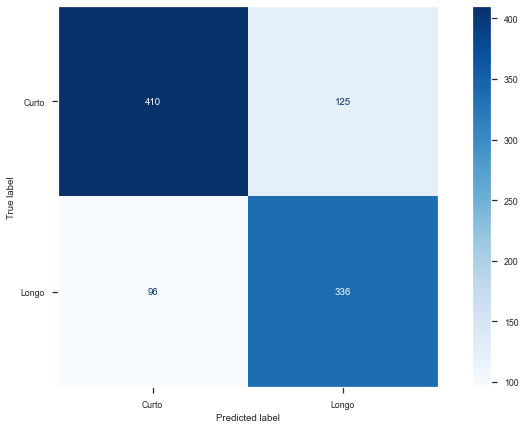

In [117]:
cnf_matrix = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(cnf_matrix, display_labels=['Curto', 'Longo'])
disp.plot(cmap = 'Blues')
plt.grid(False)

# Random Forest

In [118]:
scores_decision_tree = cross_val_score(rfc, X_train, y_train, cv = 5, scoring = 'f1')
scores_decision_tree.mean().round(4)

0.7532

In [119]:
rfc.fit(X_train, y_train)

train_predictions = rfc.predict(X_train)
test_predictions = rfc.predict(X_test)

random_forest = {'Teste': ['Acurácia', 'Recall', 'F1', 'ROC-AUC Score'],
                 'Random Forest': [accuracy_score(y_test, test_predictions), recall_score(y_test, test_predictions), f1_score(y_test, test_predictions), roc_auc_score(y_test, test_predictions)]}
c = pd.DataFrame(data = random_forest)

print(f'O F1 de treino é {f1_score(train_predictions, y_train).round(4)}')
print(f'O F1 de teste é {f1_score(test_predictions, y_test).round(4)}')

O F1 de treino é 0.8336
O F1 de teste é 0.7539


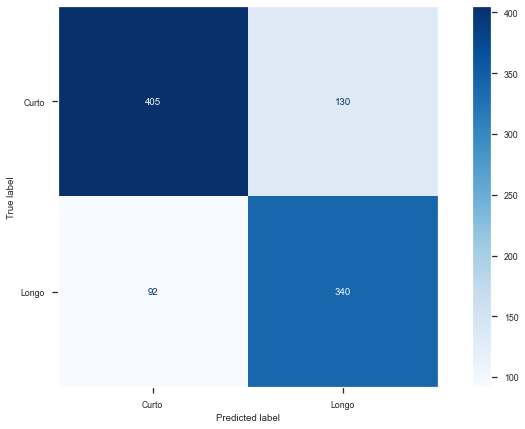

In [120]:
cnf_matrix = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(cnf_matrix, display_labels=['Curto', 'Longo'])
disp.plot(cmap = 'Blues')
plt.grid(False)

In [121]:
# resultados dos testes
metricas = [a, b, c]
resultados = reduce(lambda  left, right: pd.merge(left, right, on = ['Teste'], how = 'outer'), metricas)
resultados

,Teste,Decision Tree,XGBoost,Random Forest
0,Acurácia,0.747,0.771,0.770
1,Recall,0.812,0.778,0.787
2,F1,0.741,0.753,0.754
3,ROC-AUC Score,0.753,0.772,0.772


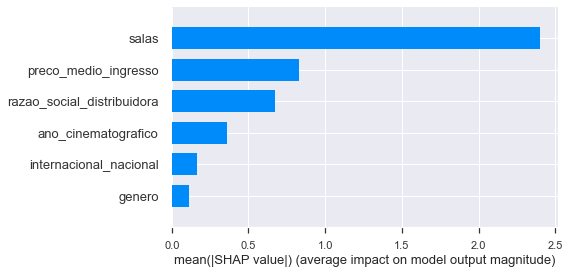

In [122]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type = 'bar')

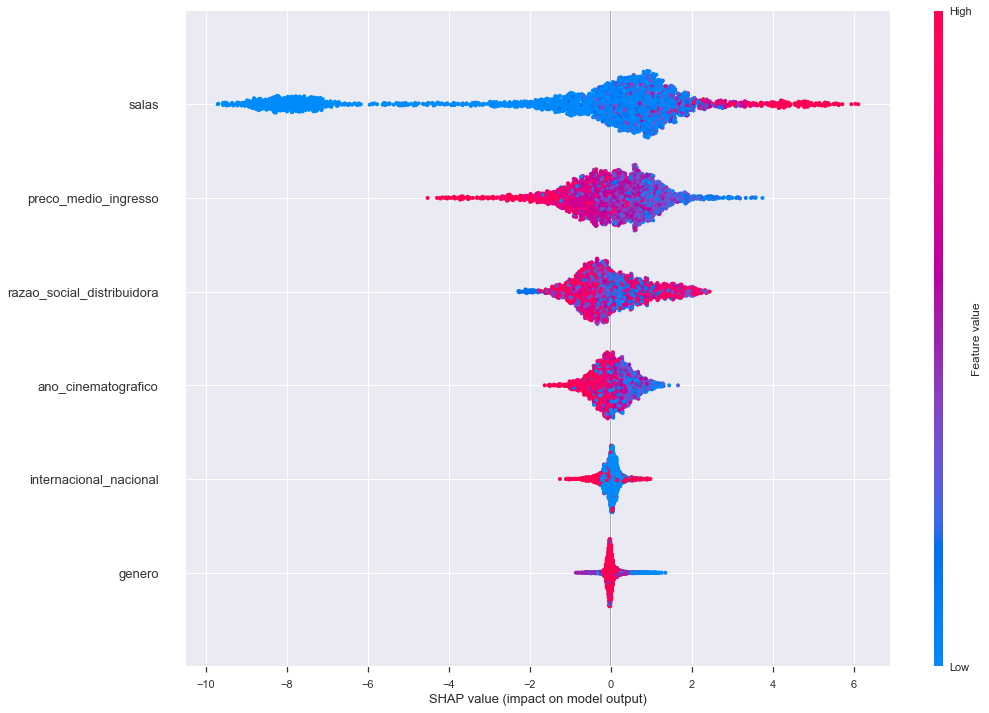

In [123]:
explainer = shap.TreeExplainer(xgb) 
shap_values = explainer.shap_values(X_train) 
shap.summary_plot(shap_values, X_train, plot_size = (15, 10)) 

# Modelagem: Vale a pena ou não comprar um filme?

Para a realização deste modelo, é necessário saber a renda que a bilheteria deve ter com um determinado filme para ser rentável ao cinema.

De acordo com este documento do SEBRAE, estima-se que o custo mensal para um cinema de pequeno porte seja da ordem de 85% do faturamento total (50% do arrecadado na bilheteria são pagos para as distribuidoras) e que o preço para manter um cinema de uma sala de 100 lugares que apresenta uma fatura em média de 600 mil reais por ano é de 510 mil reais.

Como o cinema em questão possui 2 salas com capacidade para 150 pessoas e 1 sala com capacidade para 84 pessoas, portanto, supondo que as salas lotem:

2 salas de 150 lugares: 1.800.000 reais por ano
1 sala de 84 lugares: 504.000 reais por ano
O somatório é de 2.304.000 reais por ano, o que é em torno de 192.000 reais por mês e isto menos o custo de 85% mensal fica 28.800 por mês.

Será criada então uma nova variável descontando os 85% da renda a fim de saber se o filme venderá acima ou abaixo de 28.800.

In [124]:
df4 = df.copy(deep = True)

In [125]:
df4 = df4.sort_values(by = 'renda', ascending = False)

In [126]:
#df4['tempo_exibicao'] = df4['tempo_exibicao'].dt.days
df4['renda_mes'] = (30 * df4['renda'])/df4['tempo_exibicao']

In [127]:
# Criando a variável para o lucro do mês

df4['lucro'] = df4['renda_mes']*0.15

In [128]:
# Criando a variável se vale ou não a pena comprar

renda_alta_baixa = []

for lucro in df4.lucro:
  if lucro < 28800:
    renda_alta_baixa.append(0) # Não vale a pena comprar
  else:
    renda_alta_baixa.append(1) # Vale a pena comprar

df4['renda_alta_baixa'] = renda_alta_baixa

In [129]:
colunas = ['genero', 'razao_social_distribuidora', 'internacional_nacional' , 'renda_alta_baixa']
features = ['genero', 'razao_social_distribuidora', 'internacional_nacional']
target = ['renda_alta_baixa']

In [130]:
data = df4.copy()
data = data[colunas]

In [131]:
le = LabelEncoder()

for x in data.columns:
  if data[x].dtype == 'object':
    data[x] = le.fit_transform(data[x])

data.head()

,genero,razao_social_distribuidora,internacional_nacional,renda_alta_baixa
3,2,242,0,1
5,2,242,0,1
4,2,67,0,1
14,2,253,0,1
16,2,266,0,1


In [132]:
X = data[features]
y = data[target]

In [133]:
# Observando o target

y.value_counts()

renda_alta_baixa
0                   2402
1                   1466
dtype: int64

**Balanceamento: Oversampling dos dados de treino**

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [135]:
df_over = pd.concat([X_train, y_train], axis = 1)

nao_comprar = df_over[df_over.renda_alta_baixa == 0]
comprar = df_over[df_over.renda_alta_baixa == 1]

# Upsampled da minoria
comprar_upsampled = resample(comprar, replace = True, n_samples = len(nao_comprar), random_state = 0)

# Combinando a maioria com a upsampled minoria
upsampled = pd.concat([nao_comprar, comprar_upsampled])

upsampled.renda_alta_baixa.value_counts()

0    1921
1    1921
Name: renda_alta_baixa, dtype: int64

In [136]:
# Separando as features do target

X_train = upsampled[features]
y_train = upsampled[target]

**Foram escolhidos três modelos a fim de comparar suas performances, sendo eles:**

Decision Tree

XGBoost

Random Forest Classifier

In [137]:
# Instanciando os modelos

dtc = DecisionTreeClassifier(max_depth = 12, random_state = 42)
xgb = XGBClassifier(max_depth = 5, objective = 'binary:logistic', random_state = 42)
rfc = RandomForestClassifier(max_depth = 12, random_state = 42)

# Decision Tree

In [138]:
# Validação cruzada

scores_decision_tree = cross_val_score(dtc, X_train, y_train, cv = 5, scoring = 'f1')
scores_decision_tree.mean().round(4)

0.8448

In [139]:
dtc.fit(X_train, y_train)

train_predictions = dtc.predict(X_train)
test_predictions = dtc.predict(X_test)

decision_tree = {'Teste': ['Acurácia', 'Recall', 'F1', 'ROC-AUC Score'],
                 'Decision Tree': [accuracy_score(y_test, test_predictions), recall_score(y_test, test_predictions), f1_score(y_test, test_predictions), roc_auc_score(y_test, test_predictions)]}
a = pd.DataFrame(data = decision_tree)

# Checando os resultados de treino e teste
print(f'O F1 de treino é {f1_score(train_predictions, y_train).round(4)}')
print(f'O F1 de teste é {f1_score(test_predictions, y_test).round(4)}')

O F1 de treino é 0.8605
O F1 de teste é 0.8101


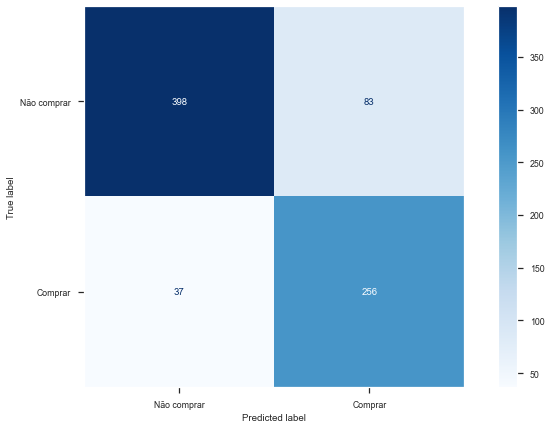

In [140]:
cnf_matrix = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(cnf_matrix, display_labels=['Não comprar', 'Comprar'])
disp.plot(cmap = 'Blues')
plt.grid(False)

# XGBoost

In [141]:
# Validação cruzada

scores_decision_tree = cross_val_score(xgb, X_train, y_train, cv = 5, scoring = 'f1')
scores_decision_tree.mean().round(4)

0.8493

In [142]:
xgb.fit(X_train, y_train)

train_predictions = xgb.predict(X_train)
test_predictions = xgb.predict(X_test)

xgboost = {'Teste': ['Acurácia', 'Recall', 'F1', 'ROC-AUC Score'],
           'XGBoost': [accuracy_score(y_test, test_predictions), recall_score(y_test, test_predictions), f1_score(y_test, test_predictions), roc_auc_score(y_test, test_predictions)]}
b = pd.DataFrame(data = xgboost)

# Checando os resultados de treino e teste
print(f'O F1 de treino é {f1_score(train_predictions, y_train).round(4)}')
print(f'O F1 de teste é {f1_score(test_predictions, y_test).round(4)}')

O F1 de treino é 0.8596
O F1 de teste é 0.8235


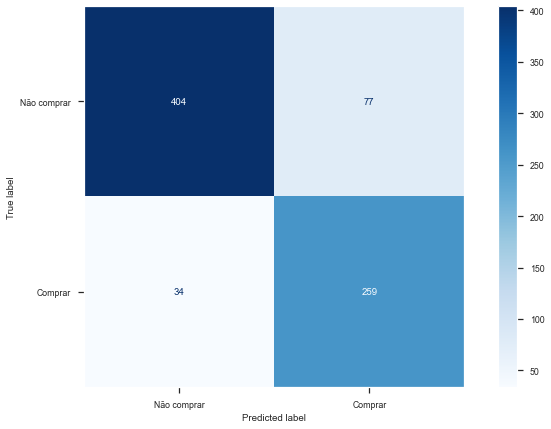

In [143]:
cnf_matrix = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(cnf_matrix, display_labels=['Não comprar', 'Comprar'])
disp.plot(cmap = 'Blues')
plt.grid(False)

# Random Forest Classifier

In [144]:
# Validação cruzada

scores_decision_tree = cross_val_score(rfc, X_train, y_train, cv = 5, scoring = 'f1')
scores_decision_tree.mean().round(4)

0.8446

In [145]:
rfc.fit(X_train, y_train)

train_predictions = rfc.predict(X_train)
test_predictions = rfc.predict(X_test)

random_forest = {'Teste': ['Acurácia', 'Recall', 'F1', 'ROC-AUC Score'],
                 'Random Forest': [accuracy_score(y_test, test_predictions), recall_score(y_test, test_predictions), f1_score(y_test, test_predictions), roc_auc_score(y_test, test_predictions)]}
c = pd.DataFrame(data = random_forest)

# Checando os resultados de treino e teste
print(f'O F1 de treino é {f1_score(train_predictions, y_train).round(4)}')
print(f'O F1 de teste é {f1_score(test_predictions, y_test).round(4)}')

O F1 de treino é 0.8566
O F1 de teste é 0.8115


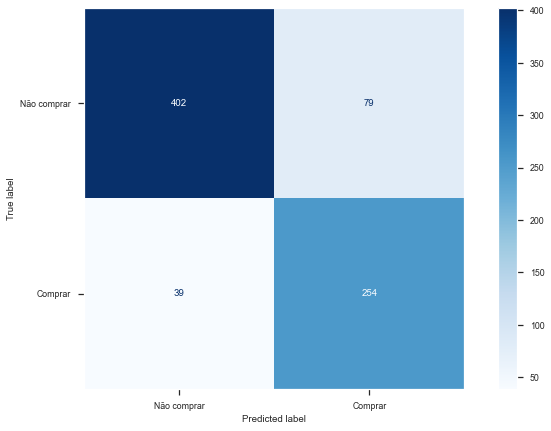

In [146]:
cnf_matrix = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(cnf_matrix, display_labels=['Não comprar', 'Comprar'])
disp.plot(cmap = 'Blues')
plt.grid(False)

In [147]:
# Exibindo os resultados dos testes

metricas = [a, b, c]
resultados = reduce(lambda  left, right: pd.merge(left, right, on = ['Teste'], how = 'outer'), metricas)
resultados

,Teste,Decision Tree,XGBoost,Random Forest
0,Acurácia,0.845,0.857,0.848
1,Recall,0.874,0.884,0.867
2,F1,0.810,0.824,0.812
3,ROC-AUC Score,0.851,0.862,0.851


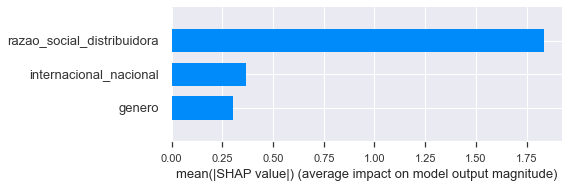

In [148]:
# Observando a importância das features no modelo

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type = 'bar')

É possível notar que o modelo com as melhores métricas foi o do XGBoost. Porém, como se trata de um cinema pequeno, talvez seja uma boa alternativa recorrer à Decision Tree, pois, além de um modelo simples e fácil de se explicar, ele exige menos poder computacional, ou seja, é mais barato e também suas métricas foram muito próximas ao modelo XGBoost.